# Analiza zbioru danych dotyczącego cen smartfonów

Projekt ten ma na celu przeprowadzenie analizy eksploracyjnej oraz wykonanie regresji liniowej na zbiorze danych dotyczących smartfonów.

Link do zbioru: https://www.kaggle.com/datasets/swahajraza/a-dataset-of-smartphone-specifications-and-prices

# Analiza zbioru

## Import bibliotek

In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pickle          # używana do zapisu modelu
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

## Wczytanie zbioru

In [184]:
df = pd.read_csv('smartphone_specifications_and_prices.csv')

df

brand_name                 model        display front_camera  \
0       SAMSUNG     Samsung S24 Ultra   6.8" (120Hz)         40MP   
1       SAMSUNG      Samsung S24 Plus   6.6" (120Hz)         10MP   
2       SAMSUNG          Samsung Zero  6.41" (120Hz)        32 MP   
3       SAMSUNG           Samsung S24   6.1" (120Hz)         10MP   
4       SAMSUNG          Samsung A05s    6.5" (90Hz)          5MP   
...         ...                   ...            ...          ...   
1251       OPPO              Oppo A37           5.0"         5 MP   
1252       OPPO               Oppo F1           5.0"         8 MP   
1253       OPPO              Oppo A31           4.5"         5 MP   
1254       OPPO        Oppo Reno 4 SE          6.43"        32 MP   
1255       OPPO  Oppo Reno 4 SE 256GB          6.43"        32 MP   

                     rare_camera          processor battery_capacity  ram  \
0     108MP + 10MP + 10MP + 12MP            Exynos          5000 mAh  8.0   
1             50MP + 10MP + 12MP            Exynos          4500 mAh  8.0   
2           12 MP + 8 MP + 12 MP  Snapdragon 888 5G         4500 mAh  8.0   
3             50MP + 10MP + 12MP            Exynos          3700 mAh  8.0   
4               50MP + 2MP + 2MP            Exynos          5000 mAh  4.0   
...                          ...                ...              ...  ...   
1251                        8 MP     Snapdragon 410          2630mAh  2.0   
1252                       13 MP     Snapdragon 616                -  3.0   
1253                        8 MP     Snapdragon 410          2000mAh  1.0   
1254         48 MP + 8 MP + 2 MP      Dimensity 720          4300mAh  8.0   
1255         48 MP + 8 MP + 2 MP      Dimensity 720          4300mAh  8.0   

      internal_storage     price  
0                  128  334999.0  
1                  128  189999.0  
2                  256  112999.0  
3                  128  249999.0  
4                   64   24999.0  
...                ...       ...  
1251                16   88415.0  
1252                16   35999.0  
1253                 8   88415.0  
1254               128   88415.0  
1255               256   88415.0  

[1256 rows x 10 columns]

## Dodanie atrybutu 'score' poprzez połączenie ze zbiorem danych

Atrybut *score* opsiuje ogólną ocenę procesora, ze strony https://nanoreview.net/en/soc-list/rating

In [185]:
dd = pd.read_csv('../web-scraping/extra_data.csv')

pd.merge(df, dd, on = 'processor')

brand_name                 model      display front_camera  \
0      SAMSUNG           Samsung A54  6.5" (90Hz)        32 MP   
1      SAMSUNG     Samsung A54 256GB  6.5" (90Hz)        32 MP   
2      SAMSUNG           Samsung A73  6.7" (90Hz)        32 MP   
3       XIAOMI           Poco M2 Pro        6.67"        16 MP   
4       XIAOMI   Poco M2 Pro 6GB Ram        6.67"        16 MP   
..         ...                   ...          ...          ...   
206       OPPO          Oppo A5 2020         6.5"         8 MP   
207       OPPO  Oppo A5 2020 4GB Ram         6.5"         8 MP   
208       OPPO          Oppo A9 2020         6.5"        16 MP   
209       OPPO        Oppo Reno 4 SE        6.43"        32 MP   
210       OPPO  Oppo Reno 4 SE 256GB        6.43"        32 MP   

                        rare_camera        processor battery_capacity  ram  \
0    64 MP + 12 MP + 1125 MP + 5 MP  Snapdragon 720G         4500 mAh  8.0   
1    64 MP + 12 MP + 1125 MP + 5 MP  Snapdragon 720G         4500 mAh  8.0   
2           108MP + 8MP + 2MP + 2MP  Snapdragon 720G         5000 mAh  8.0   
3        48 MP + 8 MP + 5 MP + 2 MP  Snapdragon 720G          5000mAh  4.0   
4        48 MP + 8 MP + 5 MP + 2 MP  Snapdragon 720G          5000mAh  6.0   
..                              ...              ...              ...  ...   
206      12 MP + 8 MP + 2 MP + 2 MP   Snapdragon 665          5000mAh  3.0   
207      12 MP + 8 MP + 2 MP + 2 MP   Snapdragon 665          5000mAh  4.0   
208      48 MP + 8 MP + 2 MP + 2 MP   Snapdragon 665          5000mAh  8.0   
209             48 MP + 8 MP + 2 MP    Dimensity 720          4300mAh  8.0   
210             48 MP + 8 MP + 2 MP    Dimensity 720          4300mAh  8.0   

     internal_storage    price  score  
0                 128  59999.0     38  
1                 256  65999.0     38  
2                 128  67999.0     38  
3                  64  31999.0     38  
4                 128  37999.0     38  
..                ...      ...    ...  
206                64  27999.0     28  
207                64  31999.0     28  
208               128  37999.0     28  
209               128  88415.0     37  
210               256  88415.0     37  

[211 rows x 11 columns]

## Usunięcie błędów w danych

In [186]:
df.loc[df.model.isin(['iPhone 14', 'iPhone 14 128GB', 'iPhone 14 256GB']), 'processor'] = 'A15 Bionic'
df.loc[df.model == 'iPhone 15 Plus', 'price'] = 349999
df.loc[df.model == 'iPhone 15 Pro', 'battery_capacity'] = '3274'
df.loc[df.model == 'iPhone 15 Pro', 'internal_storage'] = 256
df.loc[df.model.str.contains('Samsung S23'), 'processor'] = 'Snapdragon 8 Gen 2'

Jak można zauważyć, usunęło to bardzo dużą ilość danych. Głównie przez braki w tych danych lub kompatybilność zbioru danych z pliku extra_data.csv z rozważanym zbiorem.

## Poprawienie kompatybilności danych

In [187]:
def get_rid_of_5G(s):
    '''
    funkcja usuwa z ciągu znaków znaki ' 5G'
    '''
    if '5G' in s:
        if '+ 5G' in s:
            return s.replace('+ 5G', '')
        else: 
            return s.replace(' 5G', '')
    return s

df['processor'] = df['processor'].astype(str)
# print(df.dtypes)
df['processor'] = df['processor'].apply(get_rid_of_5G)

Naprawienie problemu z nazwą 'Apple Bionic Ax' , gdzie x > 11, ponieważ w nazwach procesora występują nazwy 'Bionic Ax'.

In [188]:
def get_rid_of_Apple_in_processor_name(s):
    words = s.split(' ')
    if len(words) > 2 & ('Apple' in words):
        return s.replace('Apple ', '')
    else:
        return s
    
df['processor'] = df['processor'].apply(get_rid_of_Apple_in_processor_name)

Zamiana znaku '+' na 'Plus' - ze względu na sposób zapisu w zbiorze ze statystykimi procesorów

In [189]:
def get_rid_of_plus_sign(s):
    return s.replace('+', ' Plus')

df['processor'] = df['processor'].apply(get_rid_of_plus_sign)

Usunięcie powtarzających się 2 razy nazwy producenta procesora MediaTek

In [190]:
def replace_Mediatek_with_helio(s):
    if 'MediaTek' in s:
        if ('P' in s or 'G' in s) and not 'Helio' in s:
            return s.replace('MediaTek', 'Helio')
        return s.replace('MediaTek', '')
    if 'Mediatek' in s:
        if ('P' in s or 'G' in s) and not 'Helio' in s:
            return s.replace('Mediatek', 'Helio')
        return s.replace('Mediatek', '')
    return s

df['processor'] = df['processor'].apply(replace_Mediatek_with_helio)

In [191]:
def replace_Gen1_with_Gen_1(s):
    return s.replace('Gen1', 'Gen 1')

df['processor'] = df['processor'].apply(replace_Gen1_with_Gen_1)

In [192]:
def return_for_iPhone_12(s):
    if s == 'A14':
        return 'A14 Bionic'
    return s

df['processor'] = df['processor'].apply(return_for_iPhone_12)

Ustawienie procesorów dla konkretnych telefonów

In [193]:
def set_processor_for_iPhones(row):
    if 'iPhone 15 Pro' in row['model']:
        return 'A17 Pro'
    elif 'iPhone 15' in row['model']:
        return 'A16 Bionic'
    elif 'iPhone 6s' in row['model']:
        return 'Apple A9'
    elif row['model'] in ['iPhone SE', 'iPhone SE 32GB', 'iPhone SE 64GB', 'iPhone SE 128GB']:
        return 'Apple A9'
    return row['processor']

df['processor'] = df.apply(set_processor_for_iPhones, axis = 1)

Usunięcie wyrazu, który zaczyna się na MT

In [194]:
df['processor'] = df['processor'].replace(r'\bMT\w*\b', '', regex = True)

In [195]:
def get_rid_of_last_first_space(s):
    return s.strip();

df['processor'] = df['processor'].apply(get_rid_of_last_first_space)

In [196]:
def get_rid_of_octa(s):
    if 'Octa' in s:
        return s.replace(' Octa', '')
    return s

df['processor'] = df['processor'].apply(get_rid_of_octa)

In [197]:
def add_G_to_snapdragon_750(s):
    if s == 'Snapdragon 750':
        return s+'G'
    return s

df['processor'] = df['processor'].apply(add_G_to_snapdragon_750)

Sprawdzenie jakie rezultaty daje teraz scalanie

In [198]:
df = pd.merge(df, dd, how = 'left', on = 'processor')
#print(dg[dg['brand_name'] == 'APPLE'])
print("Obiektów przed scaleniem: ", len(df))

df = df.dropna(how = "any")
print("Obiektów po scaleniu: ", len(df))


Obiektów przed scaleniem:  1256
Obiektów po scaleniu:  974


In [199]:
df.to_csv('good_data.csv', index = False)

## Oczyszczanie danych

Usunięcie nieprawidłowych rekordów

In [200]:
i = df[df.model == 'iPhone SE 4'].index
df = df.drop(i)

i = df[df.model.str.contains('iPhone 14 Mini')].index
df = df.drop(i)

i = df[df.model.str.contains('iPhone 12 Flip')].index
df = df.drop(i)

i = df[df.model.str.contains('iPhone Flip')].index
df = df.drop(i)

i = df[df.model.str.contains('iPhone SE Plus')].index
df = df.drop(i)

i = df[df.model.str.contains('iPhone SE 3')].index
df = df.drop(i)

i = df[df.model.str.contains('iPhone 12s')].index
df = df.drop(i)

Zamiana atrybutu opisowego *rear_camera* na atrybuty ilościowe. Rozdzielenie atrybututu *rear_camera* na *main_camera* - główny obiektyw, *sum_MP* - sumę megapikseli matryc, i *num_cameras* - liczbę obiektywów.

In [201]:
def count_integers(s):
    '''
    funkcja zwraca ilość wystąpień cyfr <= 200
    w ciągu oraz ich sumę liczb <= 200
    '''
    # rozdziel ciąg znaków na liczby
    words = re.findall(r'\d+', s)
    # znajdź błędy w danych (> 200 MP)
    i = 0
    sum = 0
    for w in words:
        if int(w) > 200:                # ze względu na błędy w danych
            i = i - 1
        else:
            sum = sum + int(w)
    # zlicz słowa, które są liczbami
    ret = len(words) + i
    return pd.Series([ret, sum])

Warunek, na cyfry wartość <=200 wynika z błędów danych, gdzie niektóre z kamer zostały źle przepisane

In [202]:
df[['num_cameras', 'sum_MP']] = df['rare_camera'].apply(count_integers)

Dodanie atrybutów *front_camera* - ilość megapikseli w kamerze w ekranie i *main_camera* - ilość megapikseli w głownej tylnej kamerze. W danych są one podawane jako pierwsze, w przypadku kamera z przodu najczęściej występuje jedna.

In [203]:
def find_first_number(s):
    ''' 
    funkcja zwraca pierwszą napotkaną liczbę
    w ciągu znaków
    '''
    words = re.findall(r'\d+', s)
    if len(words) > 0:
        return words[0]
    else:
        return 0

In [204]:
df['front_camera'] = df['front_camera'].apply(find_first_number)
df['main_camera']  = df['rare_camera'].apply(find_first_number)

df[['front_camera', 'main_camera']] = df[['front_camera', 'main_camera']].apply(pd.to_numeric)

# nie potrzebny już atrybut
df = df.drop(columns = 'rare_camera')

Usunięcie tabletów ze zbioru danych:

In [205]:
df = df[~df['model'].str.contains('Pad|Tab', na=False)]

Usunięcie kolumn, które nie posiadały żadnych zgodnych liczb

In [206]:
df = df[df.front_camera != 0]
df = df[df.sum_MP != 0]
df = df[df.main_camera != 0]

Obrobienie wartości pojemności baterii - tylko te rekordy, które zawierają 4 cyfrową liczbę. Jest tak, ponieważ pojemności baterii zwyczajowo dla smartfonów podaje się w tysiącach mAh, pozostałe wartości, albo są nie podane, albo są podane w Wh i dotyczą tabletów

In [207]:
df = df[(df['battery_capacity'].str.contains(pat = '\d\d\d\d', regex= True))]

df['battery_capacity'] = pd.to_numeric(df['battery_capacity'].str[-8:-3])

print("Liczba obiektów:", df.shape[0])

Liczba obiektów: 936


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_13556\4251574446.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = df[(df['battery_capacity'].str.contains(pat = '\d\d\d\d', regex= True))]


Rozdzielenie atrybutu 'display' na rozmiar ekranu i jego częstotliwość odświeżania. Jeżeli częstotliwość nie została podana przyjmuje się wartość 60.

In [208]:
# atrybut 'display' ma wartości podane w formie: <liczba>" <ew. odświeżanie ekranu>
df[['screen_size', 'refresh_rate']] = pd.DataFrame(df['display'].str.split('"').tolist(), index = df.index)
df = df.drop(columns = 'display')

df['refresh_rate'] = df['refresh_rate'].apply(lambda x: '60' if x == ''  else x[2:-3])

Dodanie kolumny z oceną procesora pozbyło się co najmiej kilkadziesiąt rekordów, lecz pomogło to w pewien sposób ujednolicić zbiór do aktualnych specyfikacji smartfonów poprzez wyeliminowanie tych, które są za stare.

## Dodanie smartfonów do bazy

In [209]:
df.loc[-1] = ['APPLE', 'iPhone 14 Plus', 12, 'A15 Bionic', 4323, 6, 128, 199999, 89, 2, 24, 12, 6.7, '60']
df.index = df.index + 1
df = df.sort_index()

df.loc[-1] = ['APPLE', 'iPhone 14 Plus 256GB', 12, 'A15 Bionic', 4323, 6, 256, 209999, 89, 2, 24, 12, 6.7, '60']
df.index = df.index + 1
df = df.sort_index()

df.loc[-1] = ['APPLE', 'iPhone 14 Plus 512GB', 12, 'A15 Bionic', 4323, 6, 512, 219999, 89, 2, 24, 12, 6.7, '60']
df.index = df.index + 1
df = df.sort_index()

df.loc[-1] = ['APPLE', 'iPhone 15 256GB', 12, 'A16 Bionic', 3349, 6, 256, 349999, 94, 2, 60, 48, 6.1, '60']
df.index = df.index + 1
df = df.sort_index()

df.loc[-1] = ['APPLE', 'iPhone 15 512GB', 12, 'A16 Bionic', 3349, 6, 512, 399999, 94, 2, 60, 48, 6.1, '60']
df.index = df.index + 1
df = df.sort_index()

df.loc[-1] = ['APPLE', 'iPhone 15 Plus 256GB', 12, 'A16 Bionic', 4383, 6, 256, 379999, 94, 2, 60, 48, 6.7, '60']
df.index = df.index + 1
df = df.sort_index()

df.loc[-1] = ['APPLE', 'iPhone 15 Plus 512GB', 12, 'A16 Bionic', 4383, 6, 512, 439999, 94, 2, 60, 48, 6.7, '60']
df.index = df.index + 1
df = df.sort_index()

df.loc[-1] = ['APPLE', 'iPhone 15 Pro 256GB', 12, 'A17 Pro', 3274, 8, 256, 429999, 94, 3, 72, 48, 6.1, '120']
df.index = df.index + 1
df = df.sort_index()

df.loc[-1] = ['APPLE', 'iPhone 15 Pro 512GB', 12, 'A17 Pro', 3274, 8, 512, 485999, 94, 3, 72, 48, 6.1, '120']
df.index = df.index + 1
df = df.sort_index()

df.loc[-1] = ['APPLE', 'iPhone 15 Pro 1TB', 12, 'A17 Pro', 3274, 8, 1024, 539999, 94, 3, 72, 48, 6.1, '120']
df.index = df.index + 1
df = df.sort_index()

df.loc[-1] = ['APPLE', 'iPhone 15 Pro Max 1TB', 12, 'A17 Pro', 4441, 8, 1024, 555999, 94, 3, 72, 48, 6.7, '120']
df.index = df.index + 1
df = df.sort_index()

df.loc[-1] = ['APPLE', 'iPhone 15 Pro Max 512GB', 12, 'A17 Pro', 4441, 8, 1024, 495999, 94, 3, 72, 48, 6.7, '120']
df.index = df.index + 1
df = df.sort_index()

## Podstawowe statystyki danych

In [210]:
print("Liczba obiektów:", df.shape[0])
marki = df['brand_name'].unique()
print("Liczba marek:", marki.shape[0])
for i in list(marki):
    print("Obiektów marki", i, ": ", len(df[df['brand_name'] == i]))
print("Liczba atrybutów:", df.shape[1])
print("Ilość braków:", df.isnull().sum().sum())

Liczba obiektów: 948
Liczba marek: 5
Obiektów marki APPLE :  91
Obiektów marki SAMSUNG :  256
Obiektów marki XIAOMI :  353
Obiektów marki ONEPLUS :  71
Obiektów marki OPPO :  177
Liczba atrybutów: 14
Ilość braków: 0


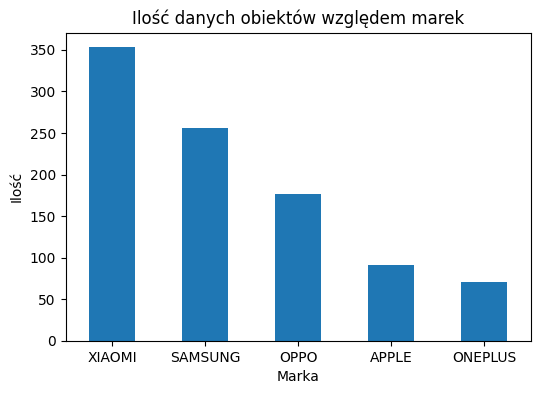

In [211]:
plt.figure(figsize=(6, 4))
df['brand_name'].value_counts().sort_values(ascending = 0).plot(kind='bar', rot = 0)
plt.title('Ilość danych obiektów względem marek', fontsize = 12)
plt.xlabel('Marka', fontsize=10)
plt.ylabel('Ilość', fontsize=10)
plt.show()

Zbiór posiada 5 producentów smartfonów oraz nie posiada braków. Większość obiektów (smartfonów) jest marki XIAOMI. Jednocześnie każdy smartfon posiada 11 atrybutów ilościowych: 
* pamięć wewnętrzną - *internal_storage* 
* pamięć RAM - *ram*
* wielkość przekątnej ekranu - *screen_size*
* odświeżanie ekranu - *refresh_rate**
* pojemność baterii - *battery* 
* cenę - *price*
* punktację procesora (od 11 do 100) - *score*
* liczba obiektów (znajdujących się z tyłu) - *num_cameras*
* suma megapikseli kamer (znajdujących się z tyłu) - *sum_MP*
* liczba megapikseli kamery frontowej - *front_camera*
* liczba megapikseli kamery z tyłu - *main_camera*

*odświeżanie ekranu może być potraktowane jako atrybut kategoryczny porządkowy, ponieważ wartości odświeżania ekranu zwykle przyjmują wartości 60, 90, 120 Hz

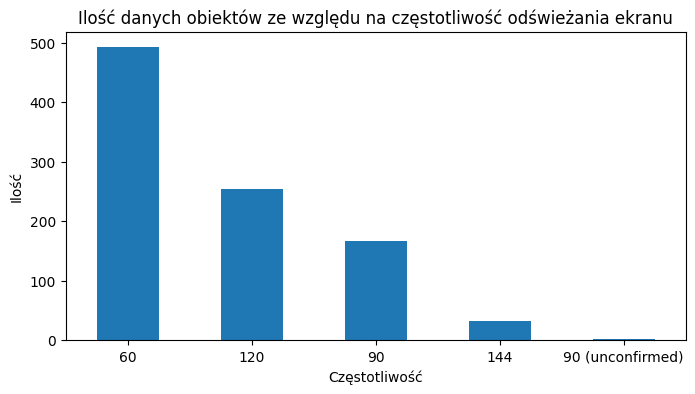

In [212]:
plt.figure(figsize=(8, 4))
df['refresh_rate'].value_counts().sort_values(ascending = 0).plot(kind='bar', rot = 0)
plt.title('Ilość danych obiektów ze względu na częstotliwość odświeżania ekranu', fontsize = 12)
plt.xlabel('Częstotliwość', fontsize=10)
plt.ylabel('Ilość', fontsize=10)
plt.show()

Pozbycie się informacji '(unconfirmed)'

In [213]:
df['refresh_rate'] = df['refresh_rate'].apply(lambda x: x[:2] if '(' in x  else x)

df[['screen_size', 'refresh_rate']] = df[['screen_size', 'refresh_rate']].apply(pd.to_numeric)

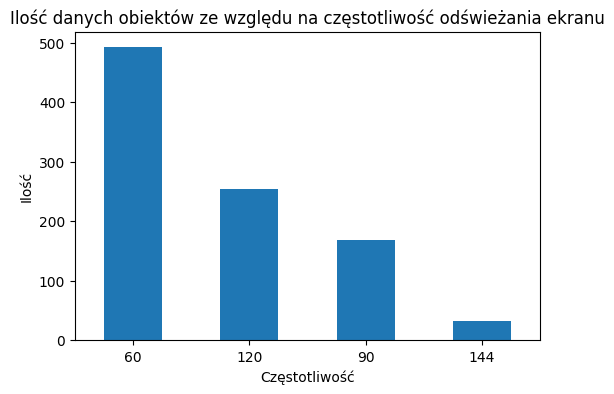

In [214]:
plt.figure(figsize=(6, 4))
df['refresh_rate'].value_counts().sort_values(ascending=0).plot(kind='bar', rot = 0)
plt.title('Ilość danych obiektów ze względu na częstotliwość odświeżania ekranu', fontsize = 12)
plt.xlabel('Częstotliwość', fontsize=10)
plt.ylabel('Ilość', fontsize=10)
plt.show()

## Wykresy pudełkowe i skrzypcowe dla danych

In [215]:
# zresetowanie indeksów
df = df.reset_index()
df = df.drop(columns = ['index'])     # usunięcie starego indeksowania

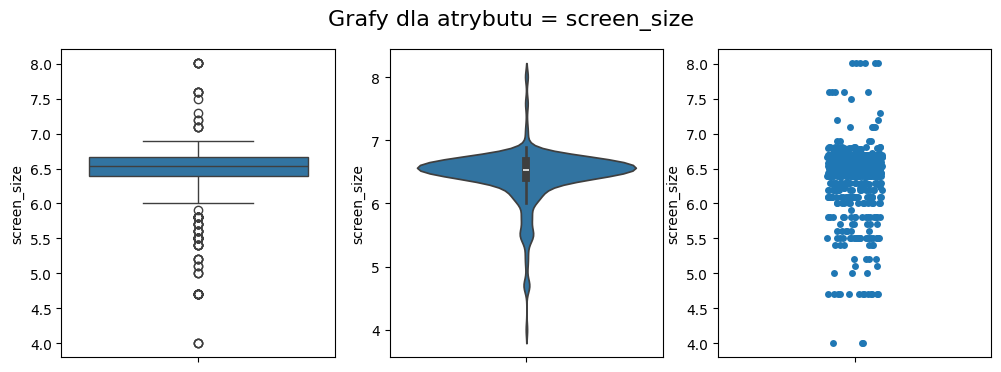

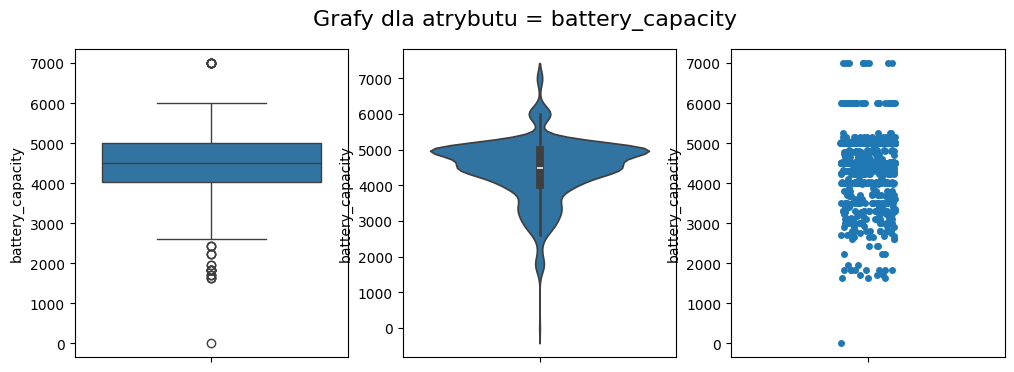

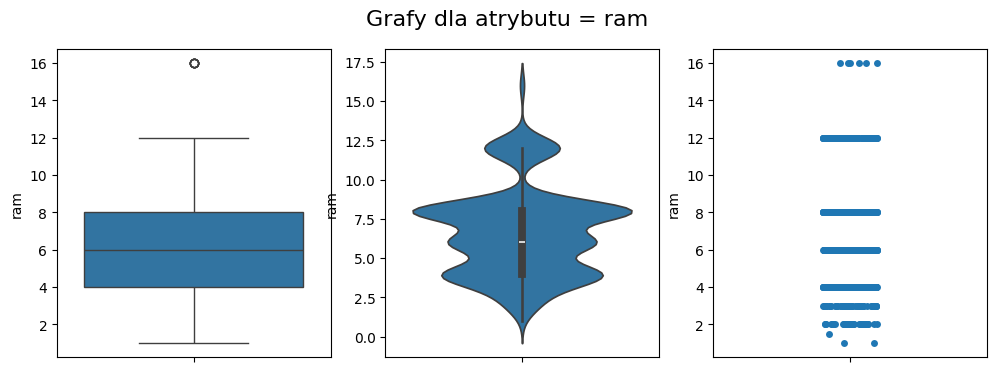

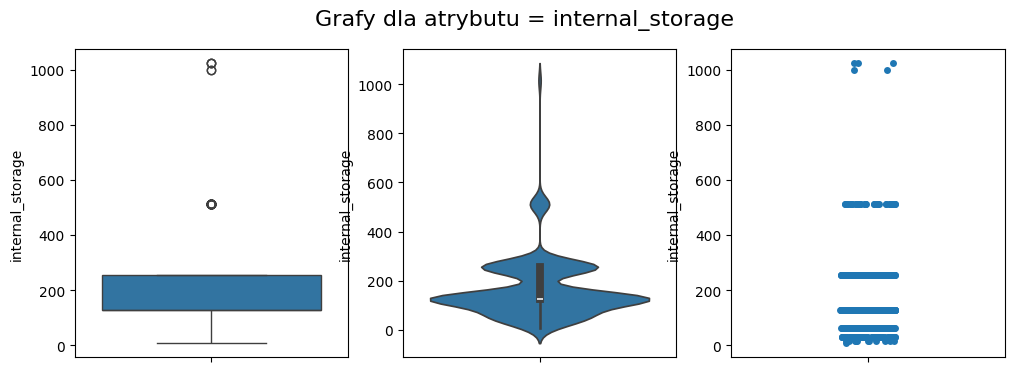

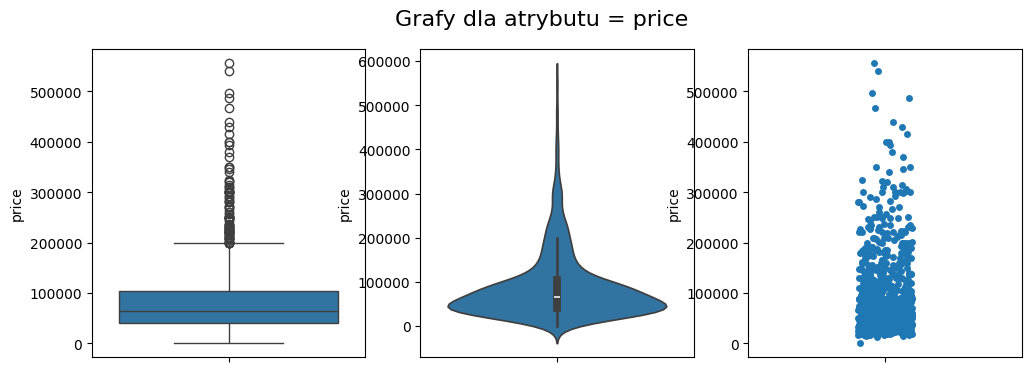

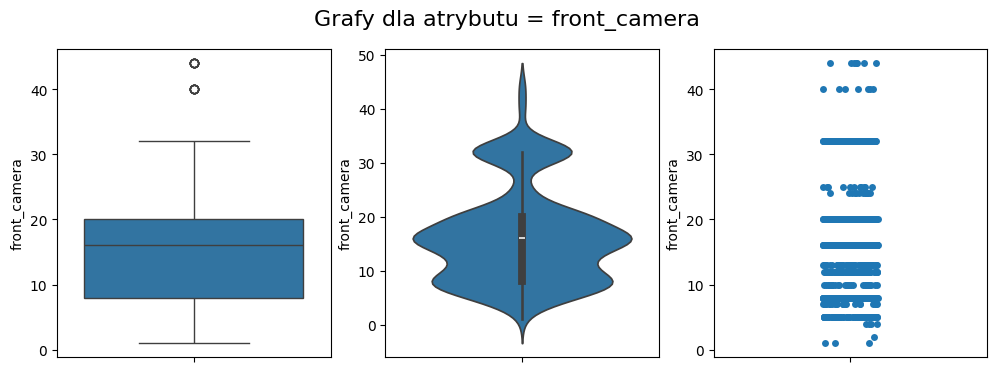

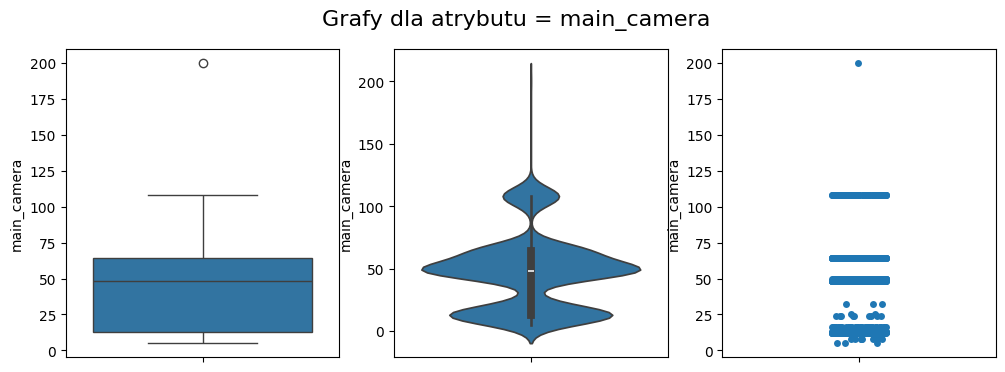

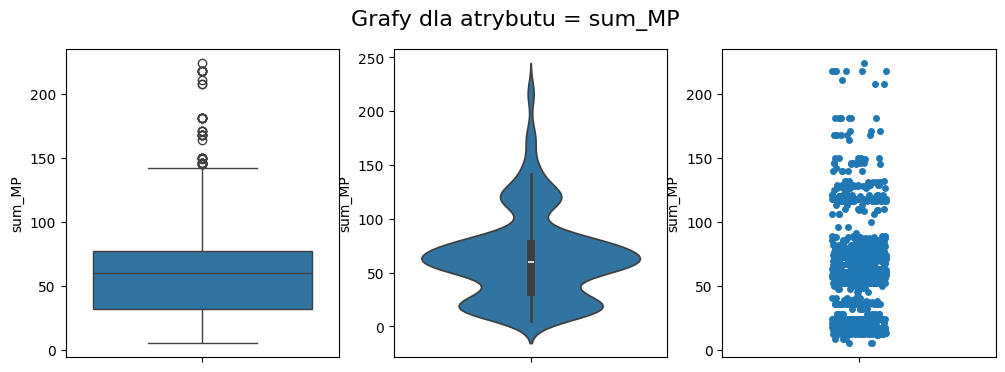

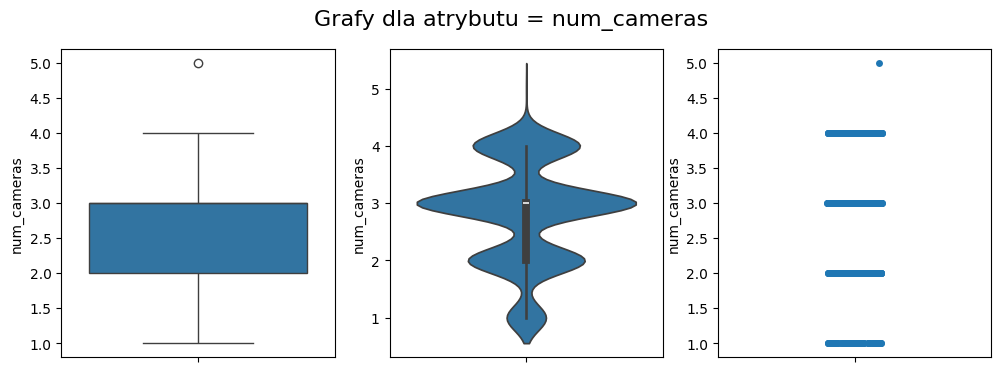

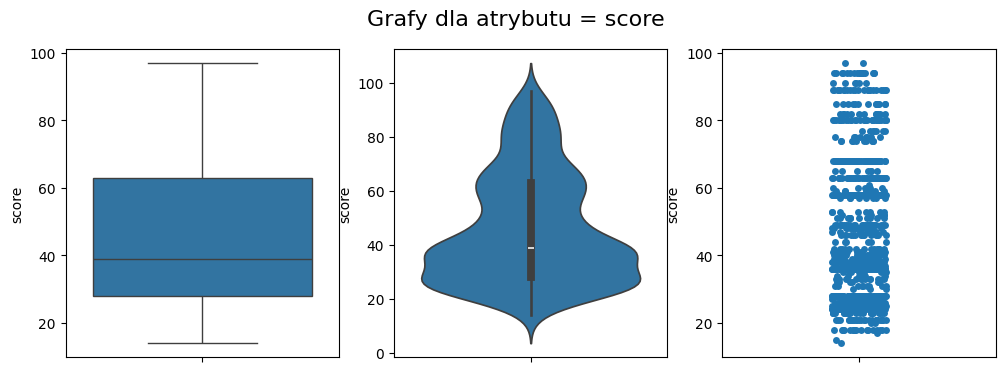

In [216]:
for attr in ['screen_size', 'battery_capacity', 'ram', 'internal_storage', 'price', 'front_camera', 'main_camera', 'sum_MP', 'num_cameras', 'score']:
    dane = df[attr]

    plt.figure(figsize=(12, 4))
    plt.suptitle(f'Grafy dla atrybutu = {attr}', fontsize=16)
    
    plt.subplot(1, 3, 1)
    plt.xticks(ha='right')
    sns.boxplot(data=dane)
    
    plt.subplot(1, 3, 2)
    plt.xticks(ha='right')
    sns.violinplot(data=dane)
    
    plt.subplot(1, 3, 3)
    plt.xticks(ha='right')
    sns.stripplot(data=dane)
    
    plt.show()

## Standardowe miary

In [217]:
description = df.describe()
description

front_camera  battery_capacity         ram  internal_storage  \
count    948.000000        948.000000  948.000000        948.000000   
mean      16.349156       4461.768987    6.660865        163.485232   
std        8.714250        841.957323    2.797498        121.308480   
min        1.000000          3.000000    1.000000          8.000000   
25%        8.000000       4020.000000    4.000000        128.000000   
50%       16.000000       4500.000000    6.000000        128.000000   
75%       20.000000       5000.000000    8.000000        256.000000   
max       44.000000       7000.000000   16.000000       1024.000000   

               price       score  num_cameras      sum_MP  main_camera  \
count     948.000000  948.000000   948.000000  948.000000   948.000000   
mean    89663.813291   46.027426     2.819620   64.138186    46.607595   
std     77488.250242   20.459177     0.872043   40.356998    28.937358   
min       399.000000   14.000000     1.000000    5.000000     5.000000   
25%     39999.000000   28.000000     2.000000   32.000000    13.000000   
50%     64999.000000   39.000000     3.000000   60.000000    48.000000   
75%    103499.000000   63.000000     3.000000   77.000000    64.000000   
max    555999.000000   97.000000     5.000000  224.000000   200.000000   

       screen_size  refresh_rate  
count   948.000000    948.000000  
mean      6.443776     84.259494  
std       0.422967     27.847301  
min       4.000000     60.000000  
25%       6.400000     60.000000  
50%       6.530000     60.000000  
75%       6.670000    120.000000  
max       8.010000    144.000000

Zmienność atrybutów

In [218]:
def calculate_coefficient_variation(column):
    return column['std']/column['mean']

description.apply(calculate_coefficient_variation, axis = 0)

front_camera        0.533009
battery_capacity    0.188705
ram                 0.419990
internal_storage    0.742015
price               0.864209
score               0.444500
num_cameras         0.309277
sum_MP              0.629220
main_camera         0.620872
screen_size         0.065640
refresh_rate        0.330495
dtype: float64

## Macierz wykresów atrybutów danych

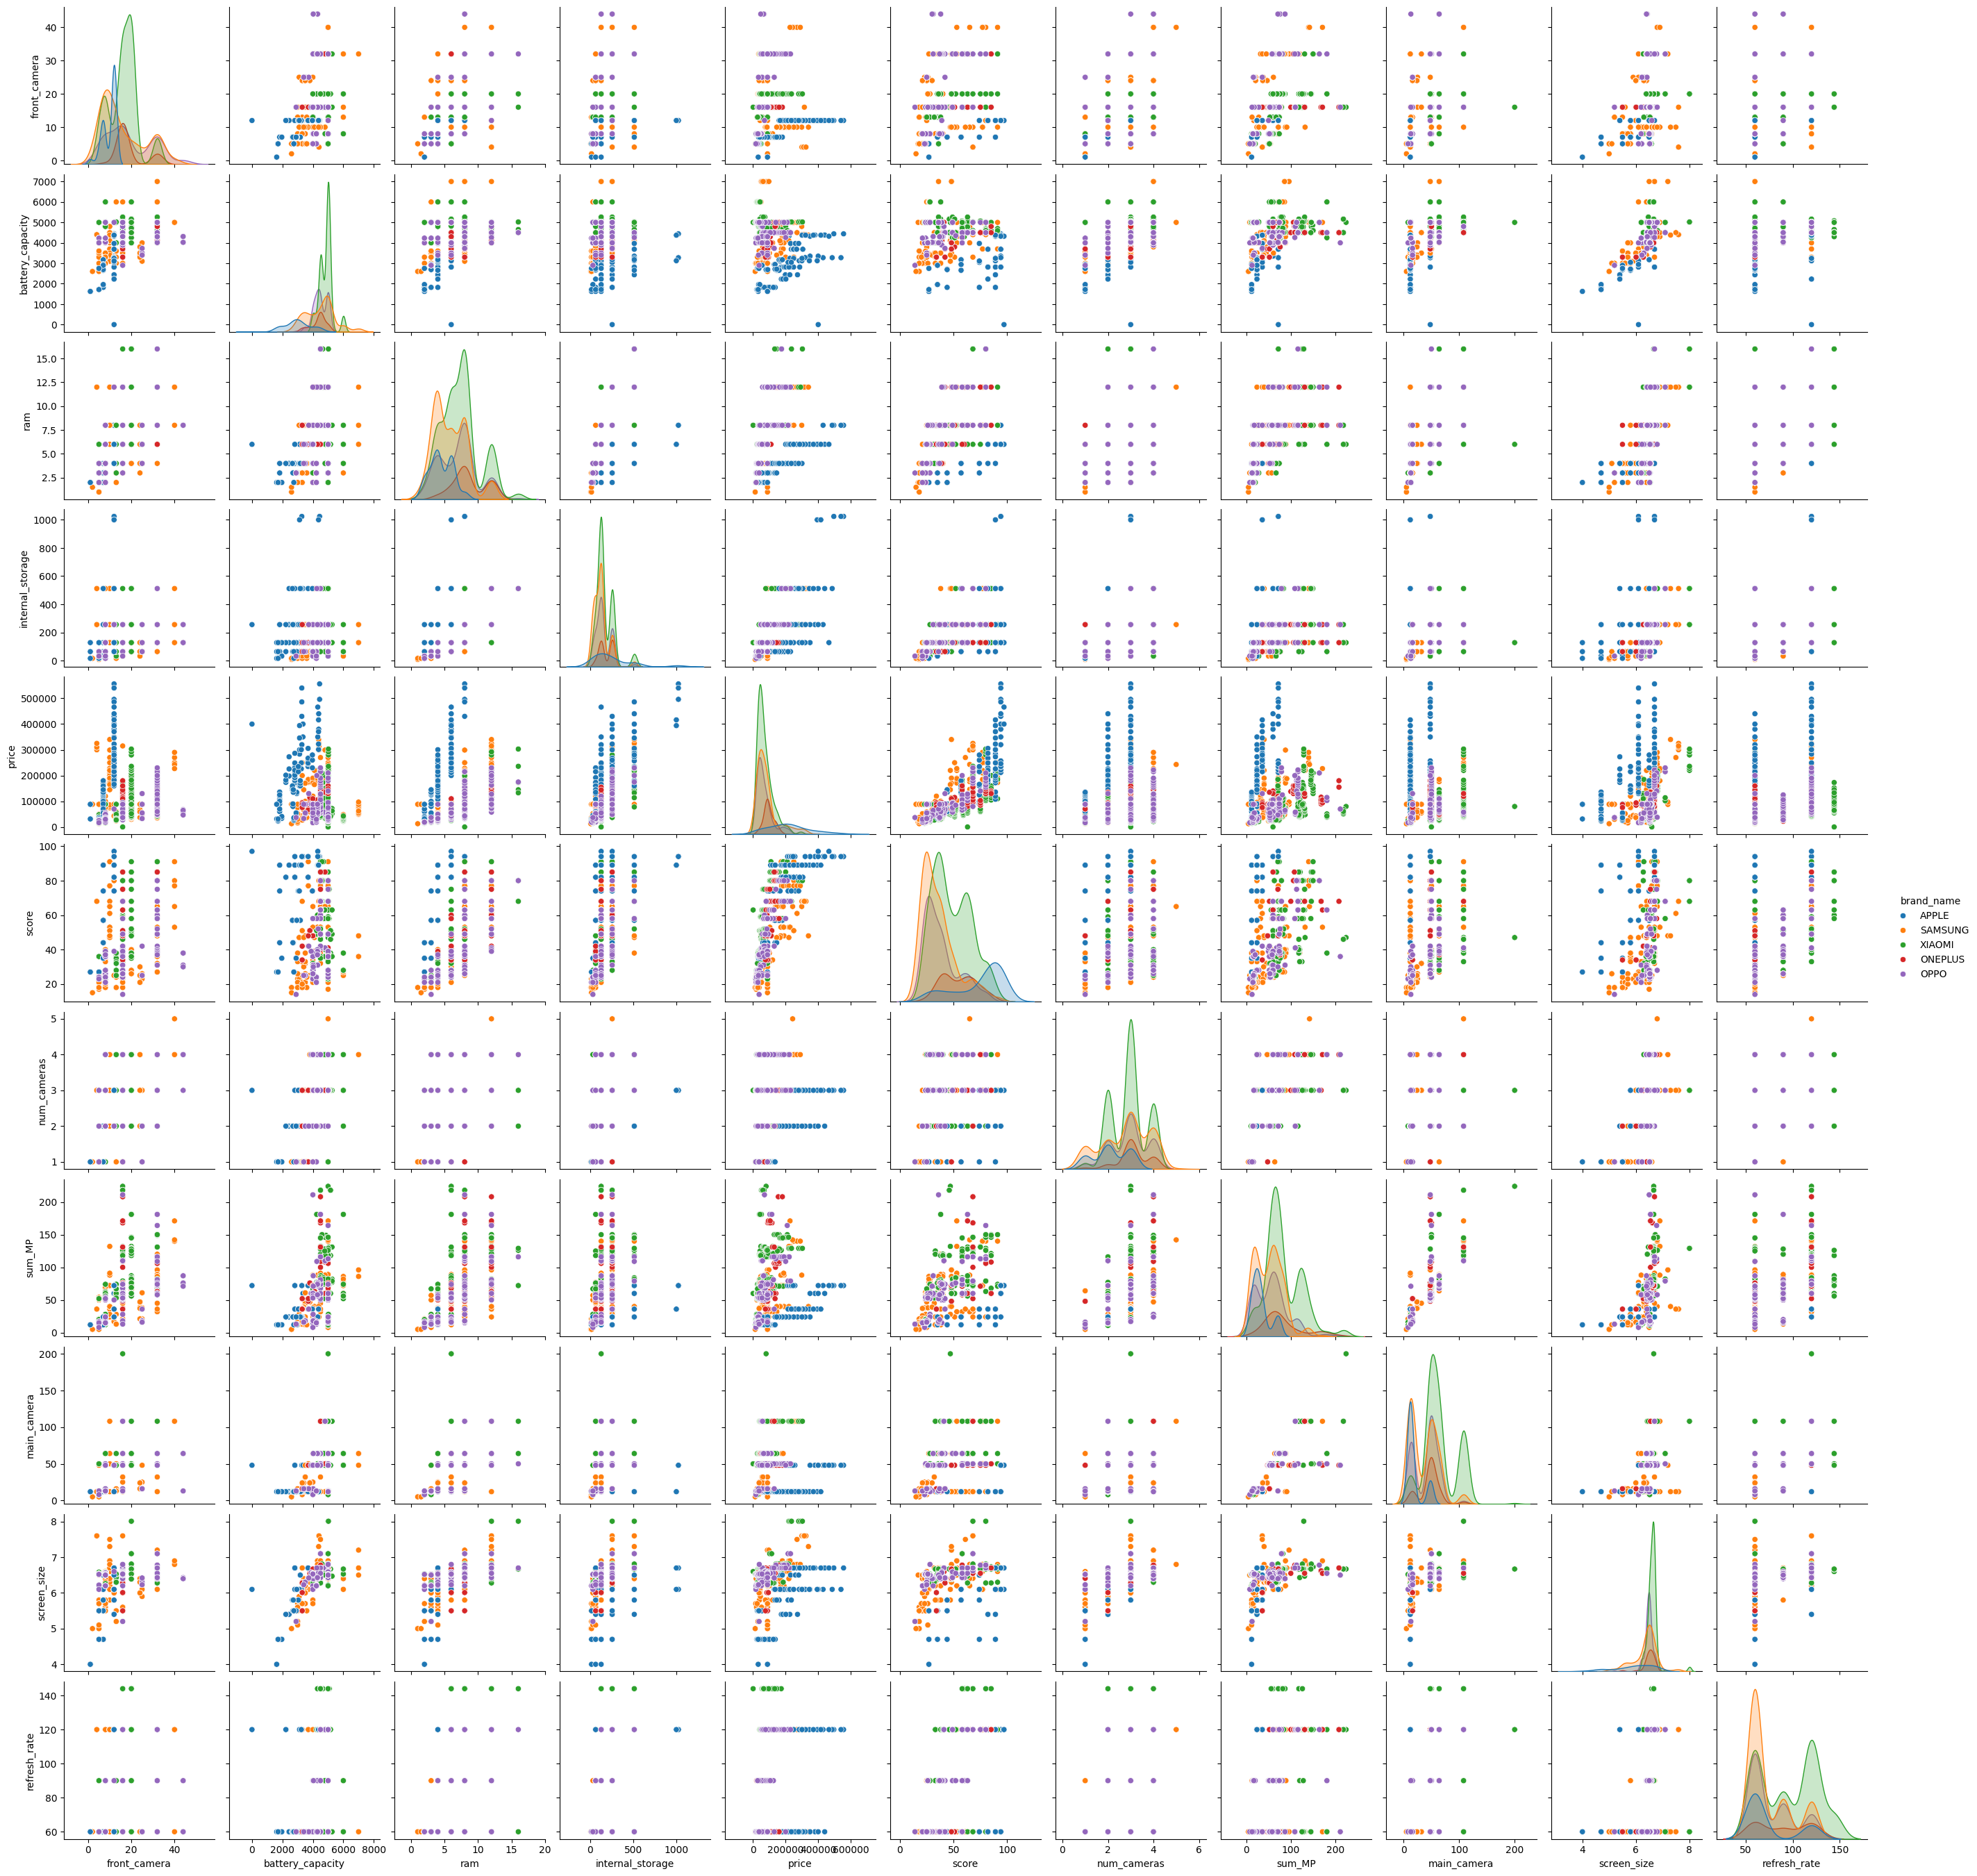

In [219]:
sns.pairplot(data = df, hue = 'brand_name')

Z powyższej macierzy można zauważyć, że marka APPLE charakteryzuje się mniejszymi pojemnościami baterii i trochę wyższą ceną niż pozostałe marki. Najprawdopodobniej jest to związane z użyciem przez nich własnego systemu operacyjnego, co może wskazywać na użycie osobnego modelu dla właśnie tych smartfonów. Również wśród produktów marki APPLE znajduje się najwięcje smartfonów o mniejszych rozmiarach ekranu.

## Macierz korelacji danych

<Axes: >

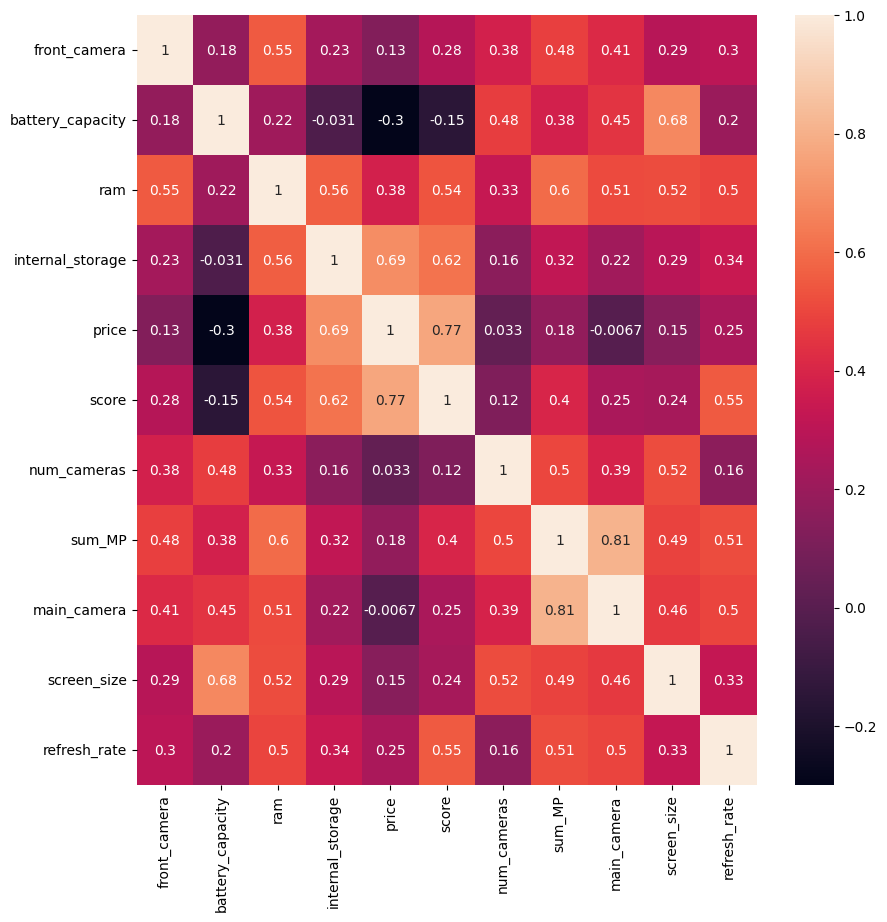

In [220]:
plt.figure(figsize=(10,10),dpi = 100)
sns.heatmap(df.iloc[:, [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]].corr(),annot = df.iloc[:, [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]].corr())

Największy wpływ na cenę ma punktacja na podstawie procesora, jest to mocna korelacja o wartości 0,78. Również dosyć dobrze skorelowane jest atrybut pamięci wewnętrznej, o wartości 0,6. Pozostałe atrybuty nie mają albo żadnego wpływu (korelacja bliska 0), lub bardzo mały wpływ. 
Atrybut, który ma najmniejsza korelację są main_camera i num_cameras, są one bliskie 0. Pozostałymi atrybutami, których korelacja z ceną < 20, są: front_camera, sum_mp, screen_size.

Najbradziej skorelowanymi ze sobą atrybutami są suma megapikseli i wartość megapikseli dla głównej kamery, ponieważ ta druga wartość stanowi składową pierwszej. Wartość tej korelacji wynosi 0,81. 
Rozmiar ekranu i pojemność baterii również są ze sobą dosyć skorelowane (wartość 0,68), co jest związane z fizycznym rozmiarem urządzenia. 
Również ciekawym jest to, że cena i pojemność baterii jest ze sobą ujemnie skorelowana, jest to najprawdopodobniej powiązane z użyciem produktów Apple, które mają mniejszą pojemność baterii, a są widocznie droższe niż większość smartfonów z androidem.

W tym przypadku atrybutami, które jako jedyne mają wpływ są: *score*, *internal_storage*, oraz słaby wpływ: *ram*, *battery_capacity*

Z powodu na słabą korelację atrybutów między sobą i sugerowany wpływ różnic ze względu na smartfony firmy APPLE, myślę, że najlepszym sposobem do uzyskania dobrych rezultatów jest przeprowadzenie analizy jeszcze raz dla podziału na smartfony APPLE i resztę, czyli te z systemem Android

In [221]:
df_apple = df[df['brand_name'] == 'APPLE']
print('Ilość smartfonów z systemem iOS:     ', len(df_apple))
# zresetowanie indeksów
df_apple = df_apple.reset_index()
df_apple = df_apple.drop(columns = ['index'])


df_android = df[df['brand_name'] != 'APPLE']
print('Ilość smartfonów z systemem Android:', len(df_android))
# zresetowanie indeksów
df_android = df_android.reset_index()
df_android = df_android.drop(columns = ['index'])

Ilość smartfonów z systemem iOS:      91
Ilość smartfonów z systemem Android: 857


Po podziale zbiór smartfonów z iOS, jest około 9-10 razy mniejszy zbiór smartfonów z android.

Analiza dla smartfonów Android

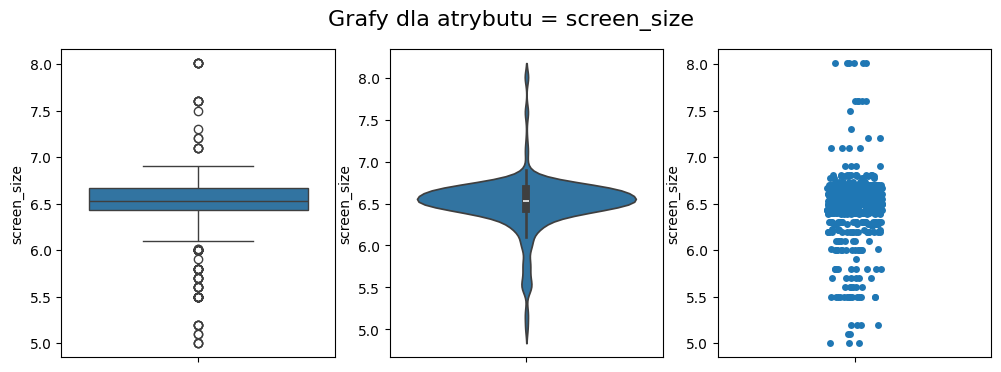

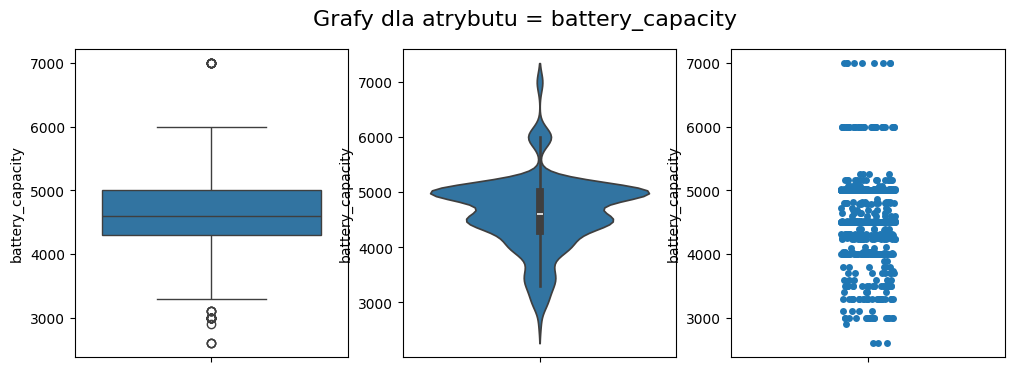

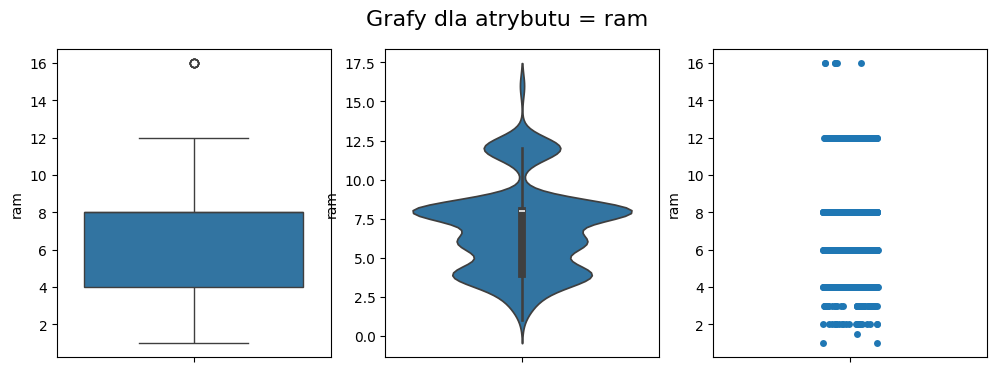

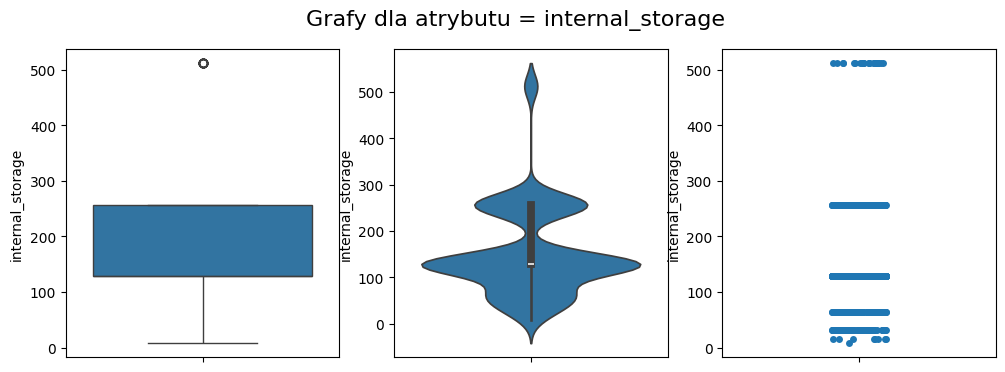

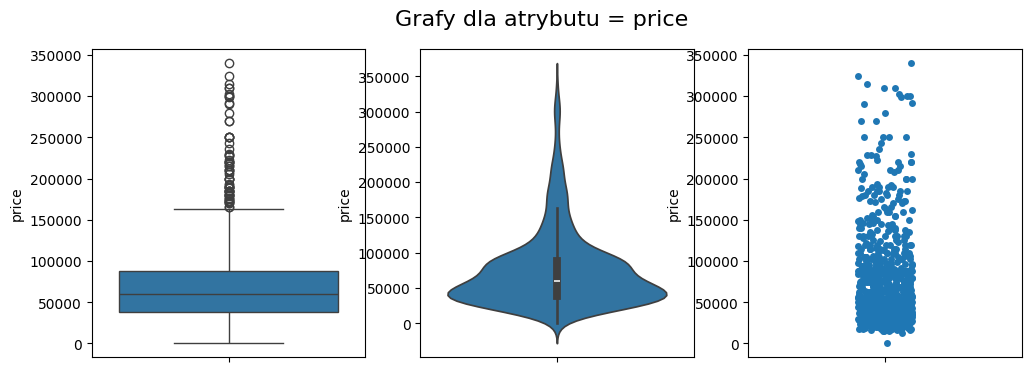

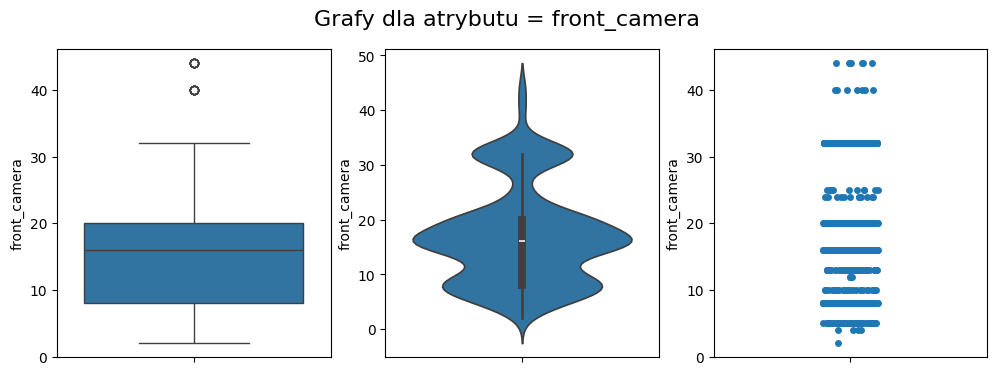

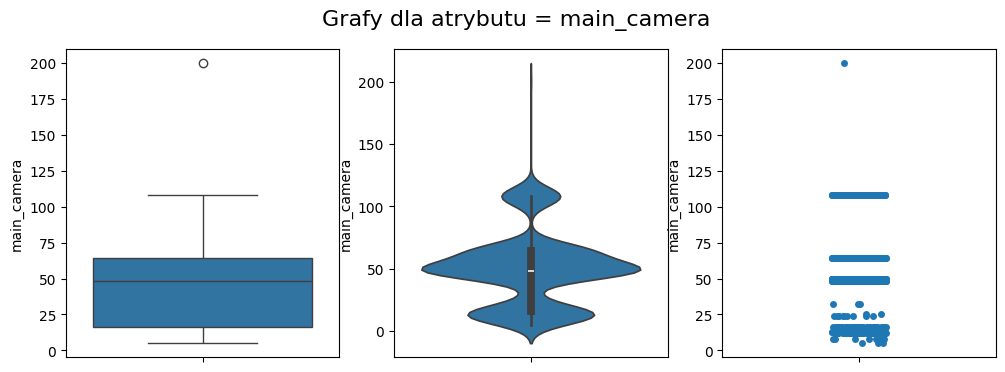

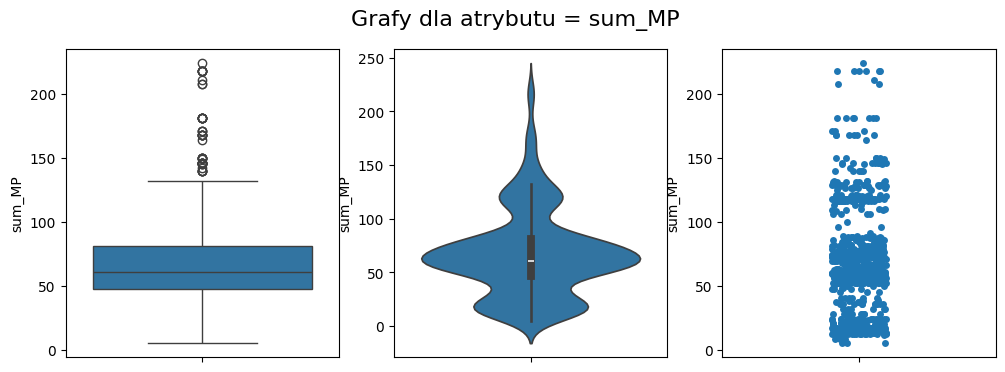

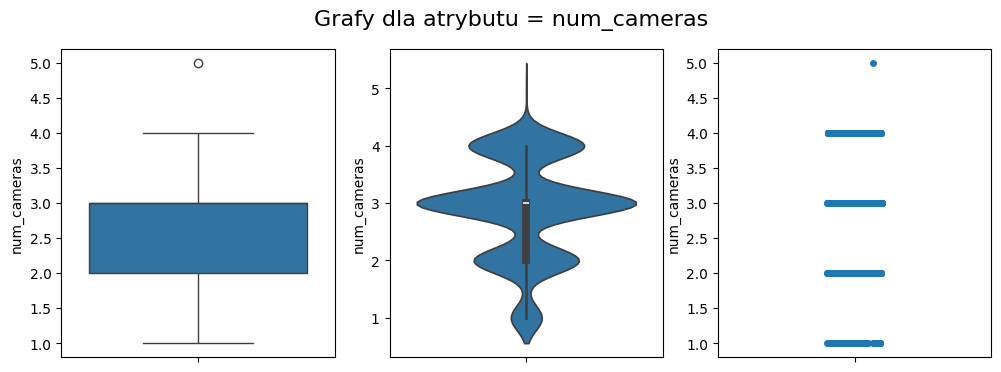

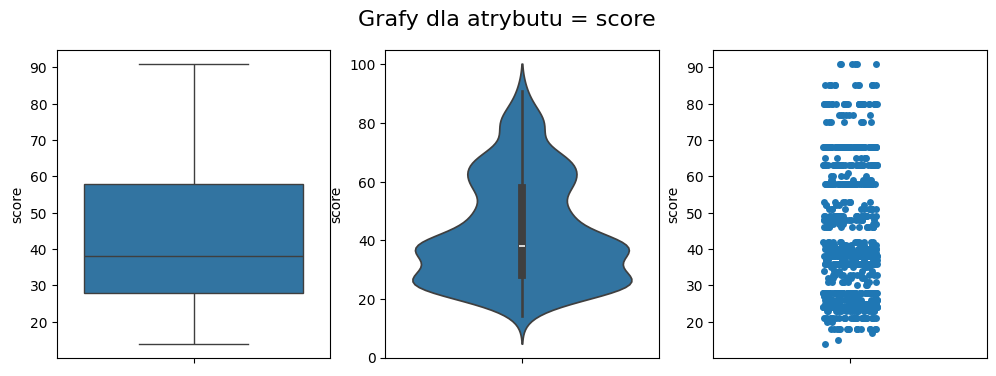

In [222]:
for attr in ['screen_size', 'battery_capacity', 'ram', 'internal_storage', 'price', 'front_camera', 'main_camera', 'sum_MP', 'num_cameras', 'score']:
    dane = df_android[attr]
    
    plt.figure(figsize=(12, 4))
    plt.suptitle(f'Grafy dla atrybutu = {attr}', fontsize=16)
    
    plt.subplot(1, 3, 1)
    plt.xticks(ha='right')
    sns.boxplot(data=dane)
    
    plt.subplot(1, 3, 2)
    plt.xticks(ha='right')
    sns.violinplot(data=dane)
    
    plt.subplot(1, 3, 3)
    plt.xticks(ha='right')
    sns.stripplot(data=dane)
    
    plt.show()

## Standardowe miary (Android)

In [223]:
android_description = df_android.describe()
android_description

front_camera  battery_capacity         ram  internal_storage  \
count    857.000000        857.000000  857.000000        857.000000   
mean      17.038506       4620.904317    6.890898        153.512252   
std        8.835975        664.140733    2.796453         96.039469   
min        2.000000       2600.000000    1.000000          8.000000   
25%        8.000000       4300.000000    4.000000        128.000000   
50%       16.000000       4600.000000    8.000000        128.000000   
75%       20.000000       5000.000000    8.000000        256.000000   
max       44.000000       7000.000000   16.000000        512.000000   

               price       score  num_cameras      sum_MP  main_camera  \
count     857.000000  857.000000   857.000000  857.000000   857.000000   
mean    76135.154026   43.136523     2.893816   67.532089    49.568261   
std     55107.838671   17.902678     0.850603   40.509566    28.531346   
min       399.000000   14.000000     1.000000    5.000000     5.000000   
25%     37999.000000   28.000000     2.000000   47.000000    16.000000   
50%     59999.000000   38.000000     3.000000   61.000000    48.000000   
75%     88415.000000   58.000000     3.000000   81.000000    64.000000   
max    339999.000000   91.000000     5.000000  224.000000   200.000000   

       screen_size  refresh_rate  
count   857.000000    857.000000  
mean      6.500817     85.365228  
std       0.322475     27.878715  
min       5.000000     60.000000  
25%       6.430000     60.000000  
50%       6.530000     90.000000  
75%       6.670000    120.000000  
max       8.010000    144.000000

Współczynnik zmienności atrybutów

In [224]:
android_description.apply(calculate_coefficient_variation, axis = 0)

front_camera        0.518589
battery_capacity    0.143725
ram                 0.405818
internal_storage    0.625614
price               0.723816
score               0.415024
num_cameras         0.293938
sum_MP              0.599857
main_camera         0.575597
screen_size         0.049605
refresh_rate        0.326582
dtype: float64

Atrybutem, który ma największą zmienność jest cena, oraz internal_storage ze względu na wiele wersji smartfonów z róznymi pojemnościami. Atybutu main_camera, sum_MP i front_camera również mają dosyć dużą zmienność > 0.5.
Najmniejsza zmienność występuje dla atrybutu screen_size.

Macierz korelacji

<Axes: >

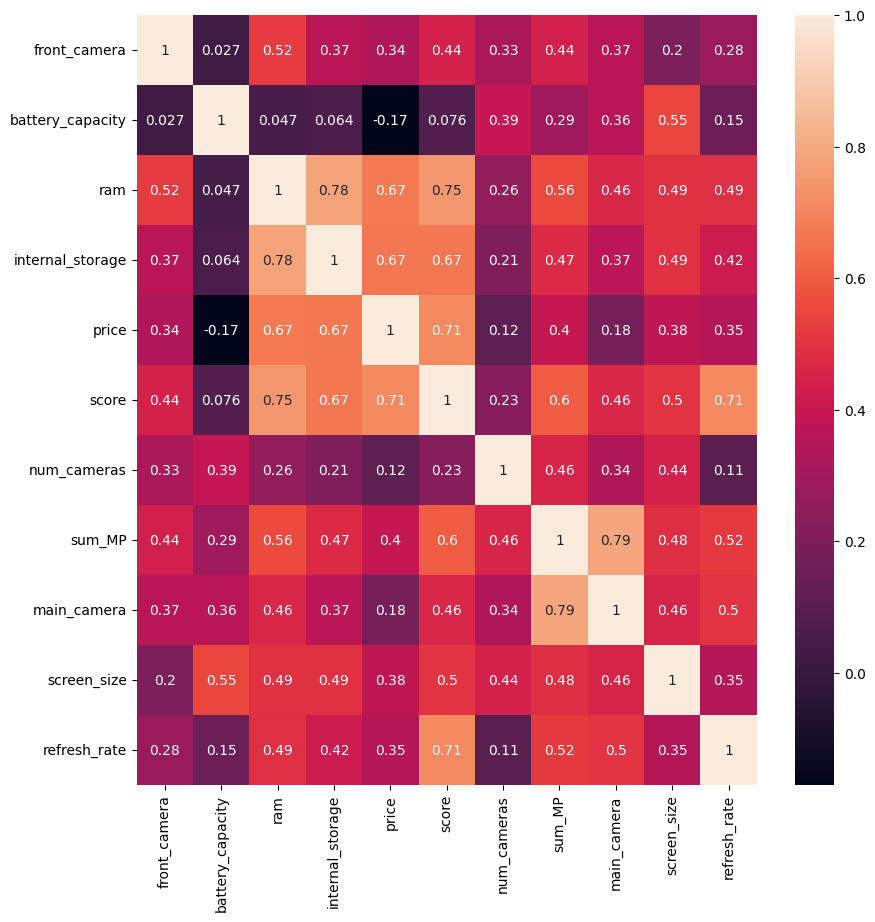

In [225]:
plt.figure(figsize=(10,10),dpi = 100)
sns.heatmap(df_android.iloc[:, [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]].corr(),annot = df_android.iloc[:, [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]].corr())

Najbardziej w zbiorze danych są ze sobą ponownie skorelowane są atrybuty sum_MP i main_camera, o wartości 0,79 i jedną z tych wartości można wyeliminować w modelu regresji liniowej. Ze względu na niższą korelację z ceną powinna być to wartości main_camera.

Dla smartfonów Apple

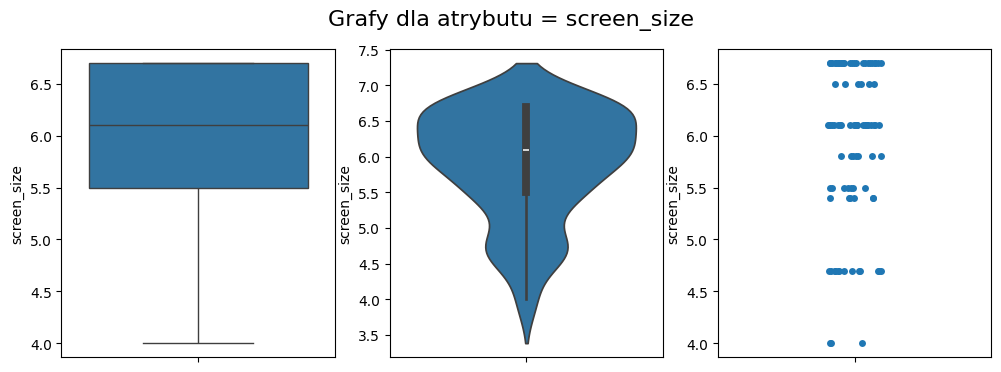

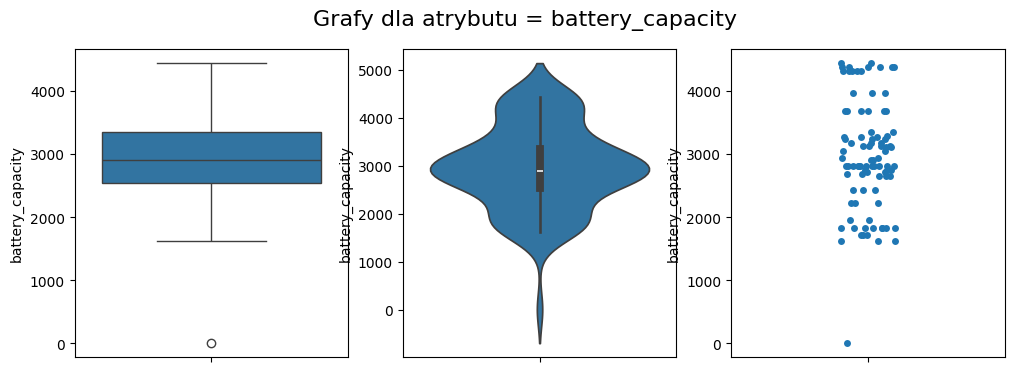

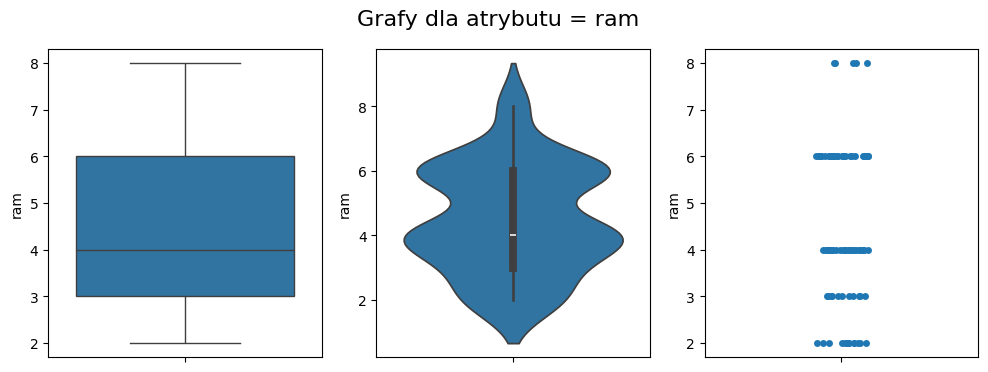

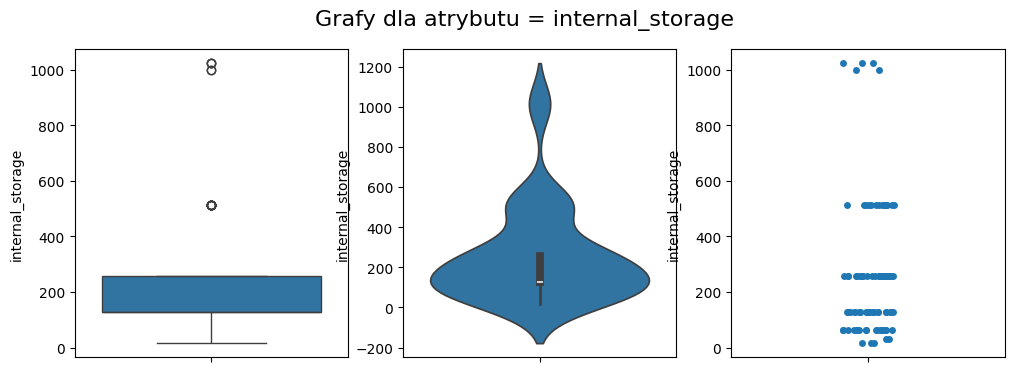

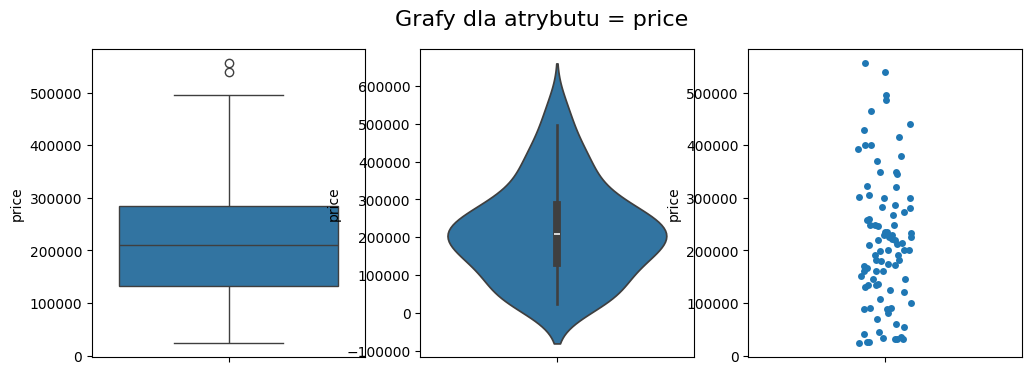

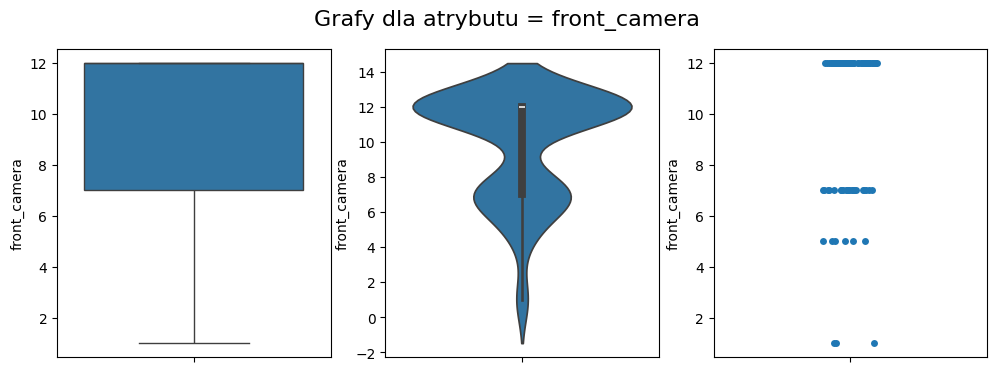

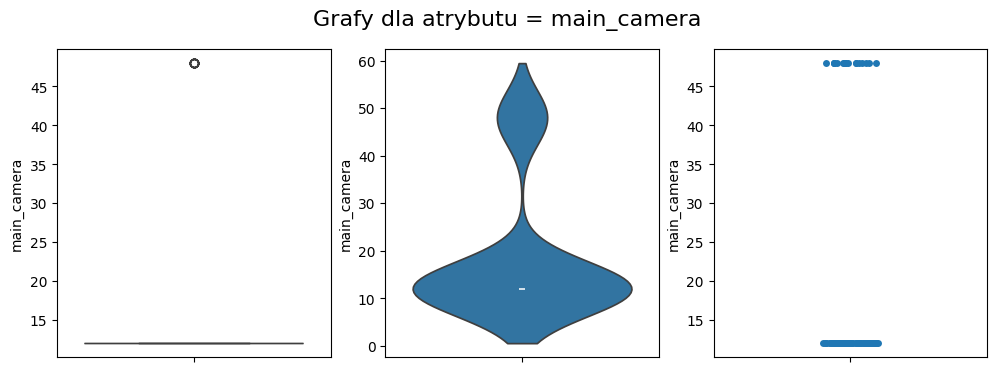

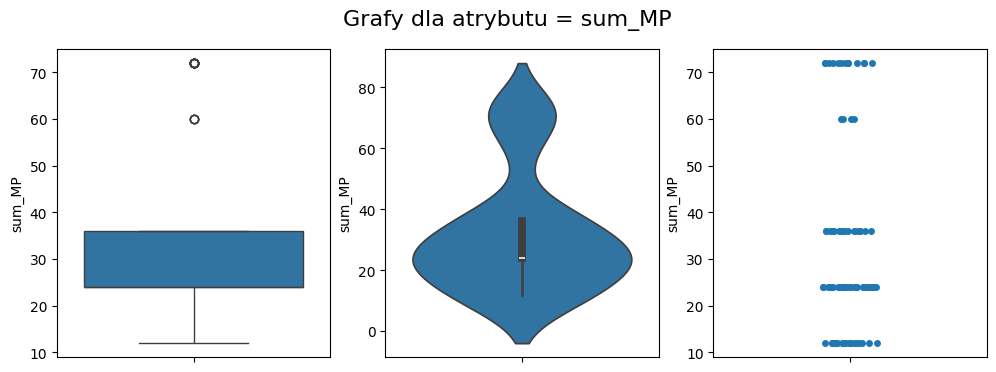

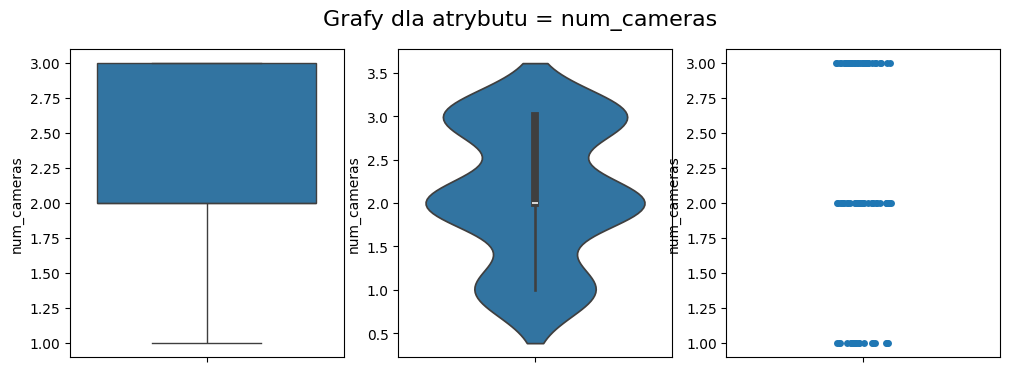

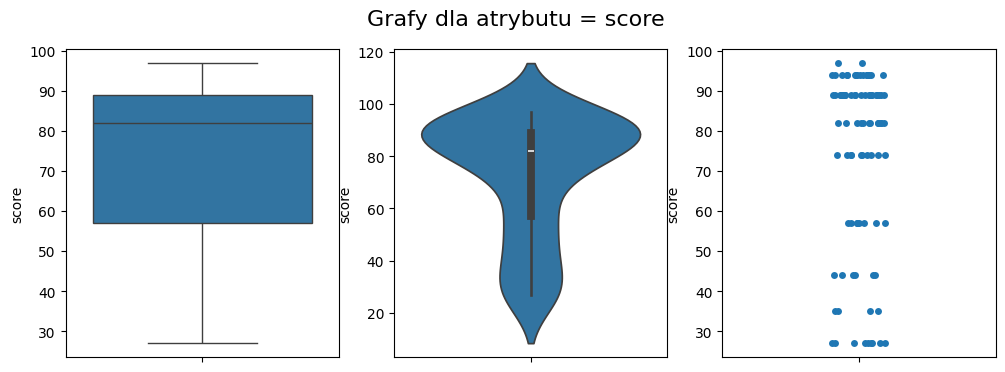

In [226]:
for attr in ['screen_size', 'battery_capacity', 'ram', 'internal_storage', 'price', 'front_camera', 'main_camera', 'sum_MP', 'num_cameras', 'score']:
    dane = df_apple[attr]
    
    plt.figure(figsize=(12, 4))
    plt.suptitle(f'Grafy dla atrybutu = {attr}', fontsize=16)
    
    plt.subplot(1, 3, 1)
    plt.xticks(ha='right')
    sns.boxplot(data=dane)
    
    plt.subplot(1, 3, 2)
    plt.xticks(ha='right')
    sns.violinplot(data=dane)
    
    plt.subplot(1, 3, 3)
    plt.xticks(ha='right')
    sns.stripplot(data=dane)
    
    plt.show()

## Standardowe miary (Apple)

In [227]:
apple_description = df_apple.describe()
apple_description

front_camera  battery_capacity        ram  internal_storage  \
count     91.000000         91.000000  91.000000         91.000000   
mean       9.857143       2963.098901   4.494505        257.406593   
std        3.053491        867.077262   1.649065        239.268793   
min        1.000000          3.000000   2.000000         16.000000   
25%        7.000000       2548.000000   3.000000        128.000000   
50%       12.000000       2900.000000   4.000000        128.000000   
75%       12.000000       3349.000000   6.000000        256.000000   
max       12.000000       4441.000000   8.000000       1024.000000   

               price      score  num_cameras     sum_MP  main_camera  \
count      91.000000  91.000000    91.000000  91.000000    91.000000   
mean   217071.076923  73.252747     2.120879  32.175824    18.725275   
std    127043.757238  22.955800     0.757704  19.667567    14.109151   
min     22999.000000  27.000000     1.000000  12.000000    12.000000   
25%    132499.000000  57.000000     2.000000  24.000000    12.000000   
50%    209999.000000  82.000000     2.000000  24.000000    12.000000   
75%    284900.000000  89.000000     3.000000  36.000000    12.000000   
max    555999.000000  97.000000     3.000000  72.000000    48.000000   

       screen_size  refresh_rate  
count    91.000000     91.000000  
mean      5.906593     73.846154  
std       0.755396     25.419556  
min       4.000000     60.000000  
25%       5.500000     60.000000  
50%       6.100000     60.000000  
75%       6.700000     60.000000  
max       6.700000    120.000000

Współczynnik zmienności atrybutów

In [228]:
apple_description.apply(calculate_coefficient_variation, axis = 0)

front_camera        0.309774
battery_capacity    0.292625
ram                 0.366907
internal_storage    0.929536
price               0.585263
score               0.313378
num_cameras         0.357259
sum_MP              0.611253
main_camera         0.753482
screen_size         0.127890
refresh_rate        0.344223
dtype: float64

Atrybutem, który ma największą zmienność jest internal_storage, ze względu na wiele wersji smartfonów z róznymi pojemnościami oraz main_camera wraz z sum_MP (atrybut zawiera wartość main_camera). Również sama cena ma dużą rozbieżność pomiędzy wartościami.
Najmniejsza zmienność występuje dla atrybutu screen_size.

<Axes: >

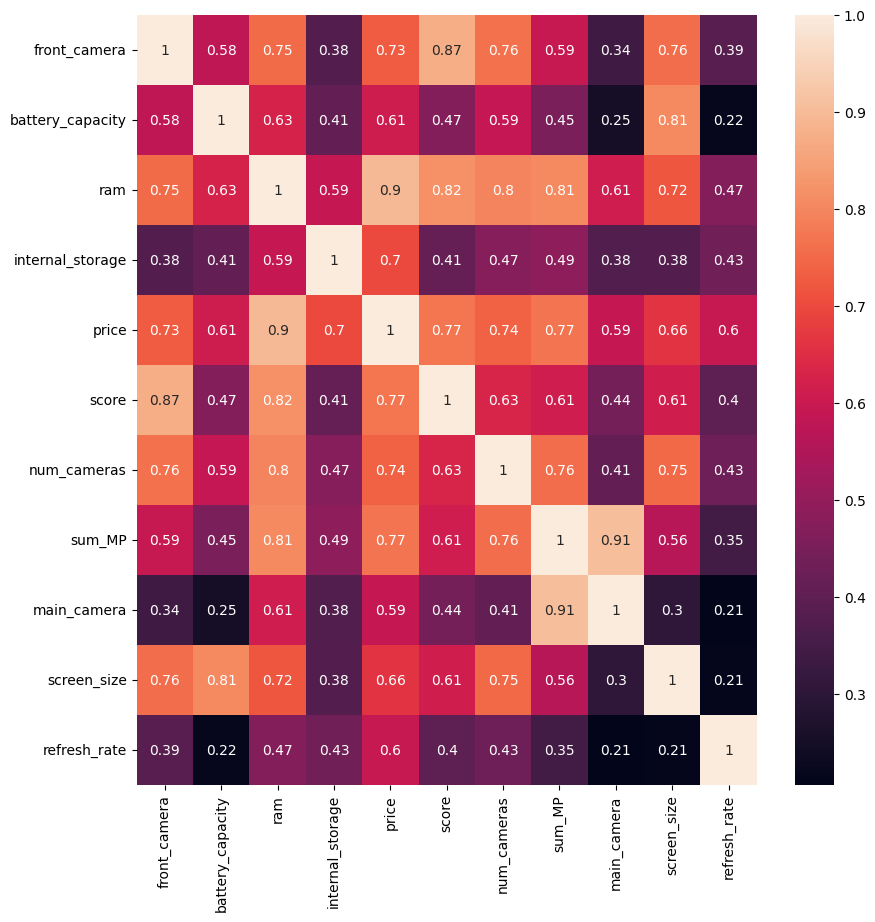

In [229]:
plt.figure(figsize=(10,10),dpi = 100)
sns.heatmap(df_apple.iloc[:, [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]].corr(),annot = df_apple.iloc[:, [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]].corr())

W powyższej macierzy, korelację >= 0.6 z ceną, mają atrybutu: front_camera, battery_capacity, ram, score, num_cameras, sum_MP, screen_size. Ze wględu na mocną korelację niektórych z tych atrybutów z ram można w modelu regresji użyć atrybutów ram, battery_capacity, front_camera.

Atrybutami, które mają ze sobą mocną korelację są main_camera i sum_MP, o wartości 0,91. Ze względu na mniejszą korelację main_camera z ceną, lepiej wyeliminować ten atrybut z modelu regresji.
Atrybutami, z których potencjalnie można jeden wyeliminować, ze względu na wysoką korelację 0,87, są front_camera i score, z których front_camera ma mniejszą korelację z ceną.

## Połączenie z bazą danych MongoDB - wczytanie i odczytanie danych

Aby wcześniej utworzyć i uruchomić bazę MongoDB w Dockerze, należy przy zainstalowanym Dockerze, w terminalu pobrać obraz poleceniem:

    docker pull mongo:latest

Następnie uruchomić sam kontener z maszyną

    docker run -d -p 27017:27017 --name mongo-db mongo:latest

Przy pierwszym uruchomieniu należy usunąc komentarze z pierwszej części i zachować je dla następnych uruchomień programu

In [230]:
from pymongo import MongoClient
db_client = MongoClient('localhost', 27017)
db = db_client.test
# dodanie ramek przerobionych danych to bazy MongoDB
#all_smartphones = db.all_smartphones
#apple_smartphones = db.apple_smartphones
##
#all_smartphones.insert_many(df.to_dict('records'))
#apple_smartphones.insert_many(df_apple.to_dict('records'))
#android_smartphones.insert_many(df_android.to_dict('records'))


df = pd.DataFrame(list(db.all_smartphones.find()))
df_apple = pd.DataFrame(list(db.apple_smartphones.find()))
df_android = pd.DataFrame(list(db.android_smartphones.find()))
print('Sprawdzenie poprawności wczytanych danych - sprawdzenie ilość obiektów w każdej ramce danych')
print(len(df))
print(len(df_apple))
print(len(df_android))

Sprawdzenie poprawności wczytanych danych - sprawdzenie ilość obiektów w każdej ramce danych
948
91
857


## Użycie regresji liniowej

Błąd dla każdego z przypadków jest obliczany jako RMSE, czyli pierwiastek z średniej odległości obiektów jako punktów od wyznaczonej przez model regresji liniowej prostej

In [231]:
def use_regression(df, attributes, dec_attribute, test_size, random = 0, min_max = False, standarization = False, stratify_arg = ""):
    ''' 
    parametry:
        df - ramka danych, która zostanie podzielona na dane uczące i testowe,
        dec_attribute - atrybut decyzujący,
        test_size - rozmiar zbioru testowego, liczba w przedziale (0.0, 1.0>,
        random - wartość seed random_state w funkcji train_test_split,
        max_min - jeżeli True dokonuje normalizacji min_max danych,
        standarization - jeżeli True dokonuje standaryzacji danych
        *uwaga jeżeli param

    zwraca:
        e_train - błąd uczenia,
        e_test - błąd generalizacji
    '''
    df_t = df.loc[:, attributes]

    if min_max == True and standarization == True:
        raise ValueError('Podano wartość min_max == True i standarization == True')

    if min_max == True:
        scaler = MinMaxScaler()
        df_t = scaler.fit_transform(df_t)
    
    if standarization == True:
        scaler = StandardScaler()
        df_t = scaler.fit_transform(df_t)

    if stratify_arg == "":
        x_train, x_test, y_train, y_test = train_test_split(df_t, df[dec_attribute], test_size = test_size, random_state = random)
    else:
        x_train, x_test, y_train, y_test = train_test_split(df_t, df[dec_attribute], test_size = test_size, random_state = random, stratify = df[stratify_arg])

    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    e_train = metrics.mean_squared_error(y_train, y_pred_train)
    y_pred_test = model.predict(x_test)
    e_test = metrics.mean_squared_error(y_test, y_pred_test)
    
    return sqrt(e_train), sqrt(e_test)

In [232]:
def plot_results(x, dokl_ucz, dokl_test, title, x_label):
    '''
    funkcja odpowiada za wizualizacje dokladnosci uczenia dla danych testowych i uczących
    
    parametry:
        x - dana rozdzielczość, dla której zebrane są dane uczenia
        dokl_ucz - wyniki dokladnosci, dla danych uczących
        dokl_test - wyniki dokladnosci, dla danych testowych
    '''
    plt.figure(dpi=100)
    plt.title(title)
    plt.plot(x, dokl_ucz, 'bo-', label = 'dane uczące')
    plt.xlabel(x_label)
    plt.ylabel('Błąd')
    plt.plot(x, dokl_test, 'ro-', label = 'dane testowe')
    plt.legend(loc='center right')
    plt.show()

Funkcja klasyfikująca do grup, w zależności od ceny. Jest ona wymagana przy użyciu stratify w funkcji train_test_split, aby podzielić dane testowe i treningowe w równych proporcjach co do ich wartości

In [233]:
def classify_based_on_price(row, bins, attribute):
    for i in range(len(bins)):
        if (row[attribute] >= bins[i]):
            return i
    return -1                                # returns where there is an error

Wszystkie atrybuty numeryczne:

In [234]:
all_attributes = ['front_camera', 'battery_capacity', 'ram', 'internal_storage', 'score', 'num_cameras', 'sum_MP', 'main_camera', 'screen_size', 'refresh_rate']

### Dla całego zbioru danych, bez podziału

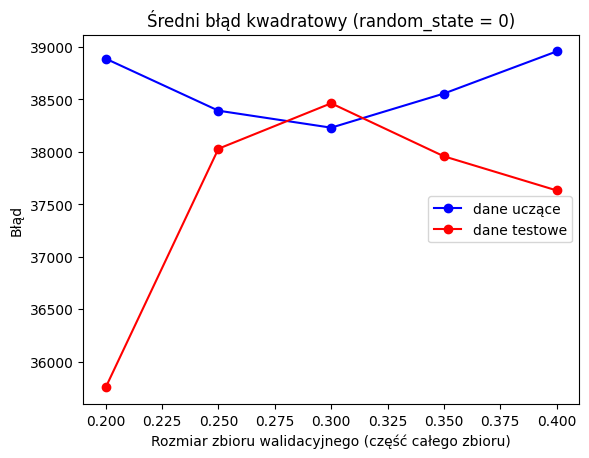

Minimalny błąd dla zbioru testowego = 35754.59045921958 dla rozmiaru danych testowych = 0.2


In [235]:
error_train = []
error_test = []
test_size = [0.2, 0.25, 0.3, 0.35, 0.4]
for size in test_size:
    [e_train, e_test] = use_regression(df, all_attributes, 'price', size)
    error_train.append(e_train)
    error_test.append(e_test)

random = 0

title = 'Średni błąd kwadratowy (random_state = ' + str(random) + ')'
x_label = 'Rozmiar zbioru walidacyjnego (część całego zbioru)'
plot_results(test_size, error_train, error_test, title, x_label)
print('Minimalny błąd dla zbioru testowego =', min(error_test), 'dla rozmiaru danych testowych =', test_size[error_test.index(min(error_test))])

Proporcjonalny podział danych testowych i uczących

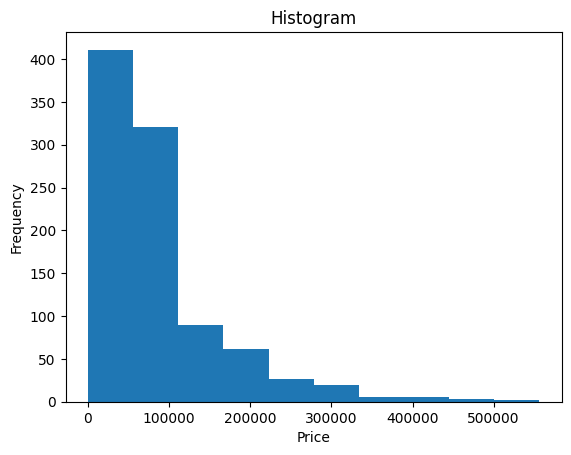

[4.44879e+05 3.89319e+05 3.33759e+05 2.78199e+05 2.22639e+05 1.67079e+05
 1.11519e+05 5.59590e+04 3.99000e+02]
Błąd uczenia:       38089.59980725963
Błąd generalizacji: 38794.265493074876


In [236]:
samples_per_bin, bins = np.histogram(df['price'])
bins = bins[:-2]   # aby pozbyć się jednoosobowej grupy
bins = bins[::-1]  # odwrócenie wartości w liście

plt.hist(df['price'])

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.show()

print(bins)
df['classification'] = df.apply(classify_based_on_price, axis = 1, args = [bins, 'price'])

[e_train, e_test] = use_regression(df, all_attributes, 'price', 0.2, stratify_arg = 'classification')
print('Błąd uczenia:      ', e_train)
print('Błąd generalizacji:', e_test)

[ 5.98896142  6.71291745  7.43687349  8.16082952  8.88478556  9.6087416
 10.33269763 11.05665367 11.7806097  12.50456574 13.22852177]


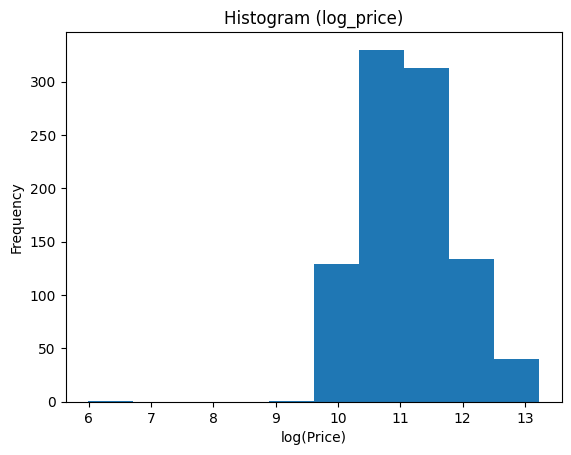

Błąd uczenia:       37106.59188101992
Błąd generalizacji: 42259.542113081916


In [237]:
df['log_price'] = np.log(df['price'])
samples_per_bin, bins = np.histogram(df['log_price'])
print(bins)
last = bins[0]
bins = bins[5:-1]
bins = bins[::-1]
bins = np.append(bins, last)

plt.hist(df['log_price'])

plt.xlabel('log(Price)')
plt.ylabel('Frequency')
plt.title('Histogram (log_price)')

plt.show()

df['class'] = df.apply(classify_based_on_price, axis = 1, args = [bins, 'log_price'])

[e_train, e_test] = use_regression(df, all_attributes, 'price', 0.2, stratify_arg = 'class')
print('Błąd uczenia:      ', e_train)
print('Błąd generalizacji:', e_test)

Nie poprawiło to rezultatów błędu generalizacji

In [238]:
print(df[df['class'] == -1])

Empty DataFrame
Columns: [_id, brand_name, model, front_camera, processor, battery_capacity, ram, internal_storage, price, score, num_cameras, sum_MP, main_camera, screen_size, refresh_rate, classification, log_price, class]
Index: []


Wybór parametru random

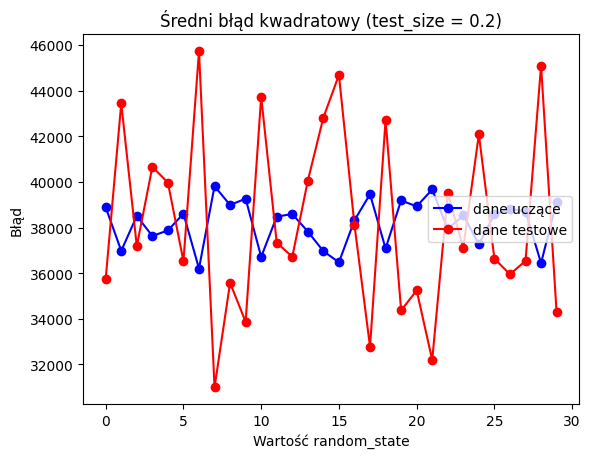

Minimalny błąd dla zbioru testowego = 30994.79208498456 dla wartości random_state = 7


In [239]:
r = range(30)
error_train = []
error_test = []
for random in range(30):
    [e_train, e_test] = use_regression(df, all_attributes, 'price', 0.2, random = random)
    error_train.append(e_train)
    error_test.append(e_test)

test_size = 0.2

title = 'Średni błąd kwadratowy (test_size = ' + str(test_size) + ')'
x_label = 'Wartość random_state'
plot_results(r, error_train, error_test, title, x_label)
print('Minimalny błąd dla zbioru testowego =', min(error_test), 'dla wartości random_state =', r[error_test.index(min(error_test))])

In [240]:
print('Normalizacja Min-Max')
[e_train_norm, e_test_norm] = use_regression(df, all_attributes, 'price', 0.2, random = 7, min_max = True)
print('Błąd uczenia      ', e_train_norm)
print('Błąd generalizacji', e_test_norm)
print()

print('Standaryzacja')
[e_train_stand, e_test_stand] = use_regression(df, all_attributes, 'price', 0.2, random = 7, standarization = True)
print('Błąd uczenia      ', e_train_stand)
print('Błąd generalizacji', e_test_stand)

Normalizacja Min-Max
Błąd uczenia       39814.65661265792
Błąd generalizacji 30994.792084984518

Standaryzacja
Błąd uczenia       39814.65661265792
Błąd generalizacji 30994.79208498457


Zarówno normalizacja Min-Max, jak i standaryzacja nie dają lepszych rezultatów.

### Apple

Wybranie parametru test_size, do jak najlepszego podziału zbioru

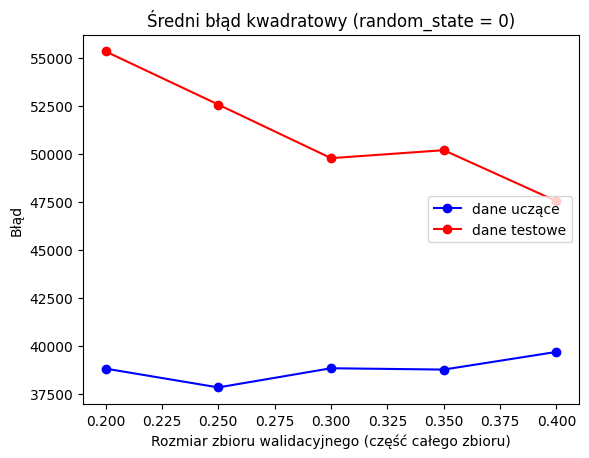

Minimalny błąd dla zbioru testowego = 47529.5652448436 dla rozmiaru danych testowych = 0.4


In [241]:
error_train = []
error_test = []
test_size = [0.2, 0.25, 0.3, 0.35, 0.4]
for size in test_size:
    [e_train, e_test] = use_regression(df_apple, all_attributes, 'price', size)
    error_train.append(e_train)
    error_test.append(e_test)

random = 0

title = 'Średni błąd kwadratowy (random_state = ' + str(random) + ')'
x_label = 'Rozmiar zbioru walidacyjnego (część całego zbioru)'
plot_results(test_size, error_train, error_test, title, x_label)
print('Minimalny błąd dla zbioru testowego =', min(error_test), 'dla rozmiaru danych testowych =', test_size[error_test.index(min(error_test))])

Proporcjonalny podział danych testowych i uczących

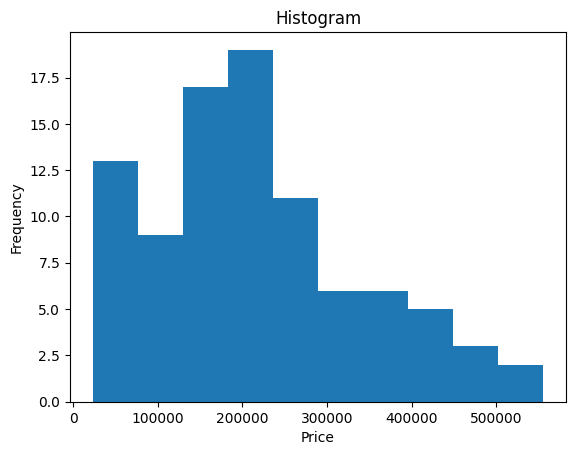

Błąd uczenia:       37829.37470585592
Błąd generalizacji: 52079.323230452836


In [242]:
samples_per_bin, bins = np.histogram(df_apple['price'])
bins = bins[:-1]   # aby pozbyć się jednoosobowej grupy
bins = bins[::-1]  # odwrócenie wartości w liście

plt.hist(df_apple['price'])

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.show()

df_apple['classification'] = df_apple.apply(classify_based_on_price, axis = 1, args = [bins, 'price'])

[e_train, e_test] = use_regression(df_apple, all_attributes, 'price', 0.4, stratify_arg = 'classification')

print('Błąd uczenia:      ', e_train)
print('Błąd generalizacji:', e_test)

Logarytmowanie ceny 

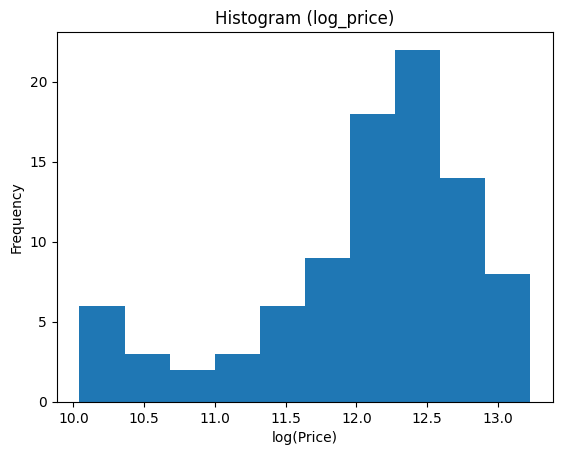

Błąd uczenia:       37684.88680009335
Błąd generalizacji: 49754.37820109368


In [243]:
df_apple['log_price'] = np.log(df_apple['price'])
samples_per_bin, bins = np.histogram(df_apple['log_price'])

plt.hist(df_apple['log_price'])

plt.xlabel('log(Price)')
plt.ylabel('Frequency')
plt.title('Histogram (log_price)')

plt.show()

df_apple['class'] = df_apple.apply(classify_based_on_price, axis = 1, args = [bins, 'log_price'])

[e_train, e_test] = use_regression(df_apple, all_attributes, 'price', 0.4, stratify_arg = 'class')

print('Błąd uczenia:      ', e_train)
print('Błąd generalizacji:', e_test)

Proporcjonalny podział danych praktycznie nie poprawił wyniku błędu generalizacji

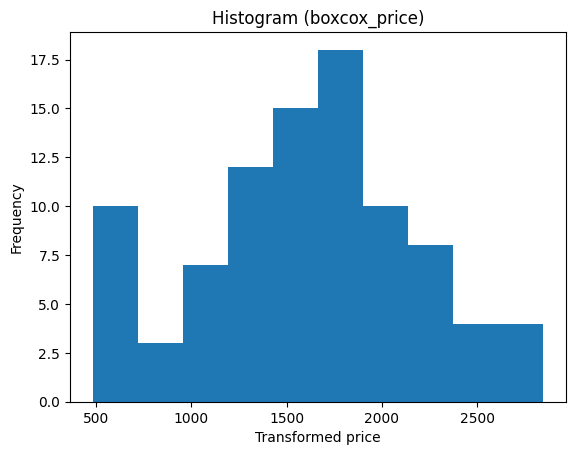

Błąd uczenia:       38507.36826458079
Błąd generalizacji: 45150.585085414255


In [244]:
from scipy.stats import boxcox

[df_apple['boxcox_price'], best_lambda] = boxcox(df_apple['price'])
samples_per_bin, bins = np.histogram(df_apple['boxcox_price'])

bins = bins[:-1]
bins = bins[::-1]

plt.hist(df_apple['boxcox_price'])

plt.xlabel('Transformed price')
plt.ylabel('Frequency')
plt.title('Histogram (boxcox_price)')

plt.show()

df_apple['class'] = df_apple.apply(classify_based_on_price, axis = 1, args = [bins, 'boxcox_price'])

[e_train, e_test] = use_regression(df_apple, all_attributes, 'price', 0.4, stratify_arg = 'class')
print('Błąd uczenia:      ', e_train)
print('Błąd generalizacji:', e_test)

Użycie transformacji BoxCox daje lepsze rezultaty dla błędu generalizacji.

Wybranie parametru random

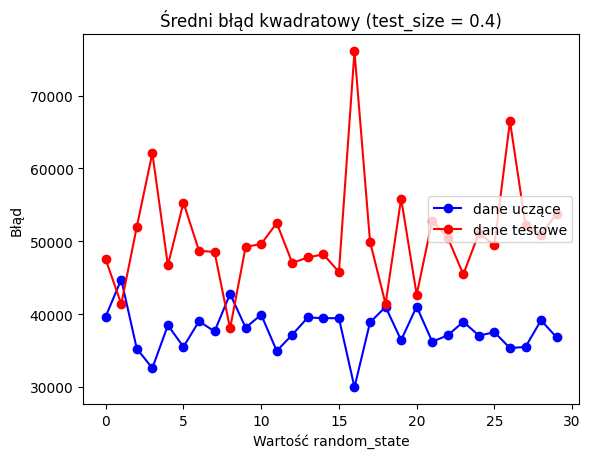

Minimalny błąd dla zbioru testowego = 38048.2768787509 dla wartości random_state = 8


In [245]:
r = range(30)
error_train = []
error_test = []
for random in range(30):
    [e_train, e_test] = use_regression(df_apple, all_attributes, 'price', 0.4, random = random)
    error_train.append(e_train)
    error_test.append(e_test)

test_size = 0.4

title = 'Średni błąd kwadratowy (test_size = ' + str(test_size) + ')'
x_label = 'Wartość random_state'
plot_results(r, error_train, error_test, title, x_label)
print('Minimalny błąd dla zbioru testowego =', min(error_test), 'dla wartości random_state =', r[error_test.index(min(error_test))])

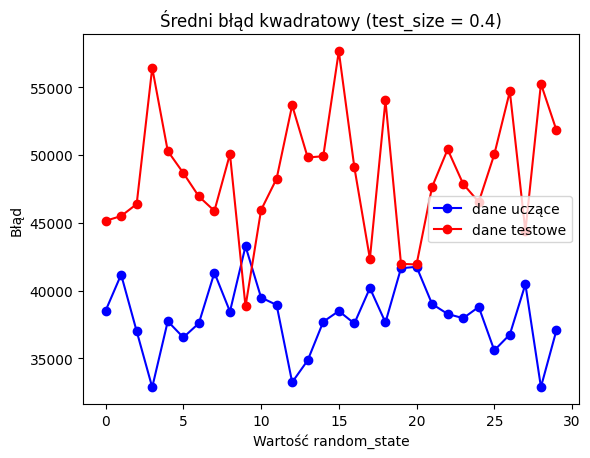

Minimalny błąd dla zbioru testowego = 38830.44300627375 dla wartości random_state = 9


In [246]:
r = range(30)
error_train = []
error_test = []
for random in range(30):
    [e_train, e_test] = use_regression(df_apple, all_attributes, 'price', 0.4, random = random, stratify_arg = 'class')
    error_train.append(e_train)
    error_test.append(e_test)

test_size = 0.4

title = 'Średni błąd kwadratowy (test_size = ' + str(test_size) + ')'
x_label = 'Wartość random_state'
plot_results(r, error_train, error_test, title, x_label)
print('Minimalny błąd dla zbioru testowego =', min(error_test), 'dla wartości random_state =', r[error_test.index(min(error_test))])

In [247]:
print('Normalizacja Min-Max')
[e_train_apple_norm, e_test_apple_norm] = use_regression(df_apple, all_attributes, 'price', 0.4, random = 8, min_max = True)
print('Błąd uczenia      ', e_train_apple_norm)
print('Błąd generalizacji', e_test_apple_norm)
print()

print('Standaryzacja')
[e_train_apple_stand, e_test_apple_stand] = use_regression(df_apple, all_attributes, 'price', 0.4, random = 8, standarization = True)
print('Błąd uczenia      ', e_train_apple_stand)
print('Błąd generalizacji', e_test_apple_stand)

Normalizacja Min-Max
Błąd uczenia       42796.97439410134
Błąd generalizacji 38048.27687875044

Standaryzacja
Błąd uczenia       42796.97439410135
Błąd generalizacji 38048.276878750454


Zarówno normalizacja Min-Max, jak i standaryzacja nie dały lepszych rezultatów.

### Android

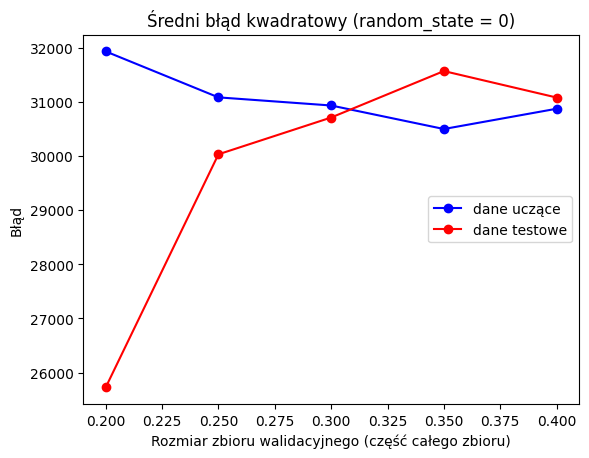

Minimalny błąd dla zbioru testowego = 25724.58857962461 dla rozmiaru danych testowych = 0.2


In [248]:
error_train = []
error_test = []
test_size = [0.2, 0.25, 0.3, 0.35, 0.4]
for size in test_size:
    [e_train, e_test] = use_regression(df_android, all_attributes, 'price', size)
    error_train.append(e_train)
    error_test.append(e_test)

random = 0

title = 'Średni błąd kwadratowy (random_state = ' + str(random) + ')'
x_label = 'Rozmiar zbioru walidacyjnego (część całego zbioru)'
plot_results(test_size, error_train, error_test, title, x_label)
print('Minimalny błąd dla zbioru testowego =', min(error_test), 'dla rozmiaru danych testowych =', test_size[error_test.index(min(error_test))])

Dokonanie proporcjonalnego podziału zbioru danych uczących i testowych

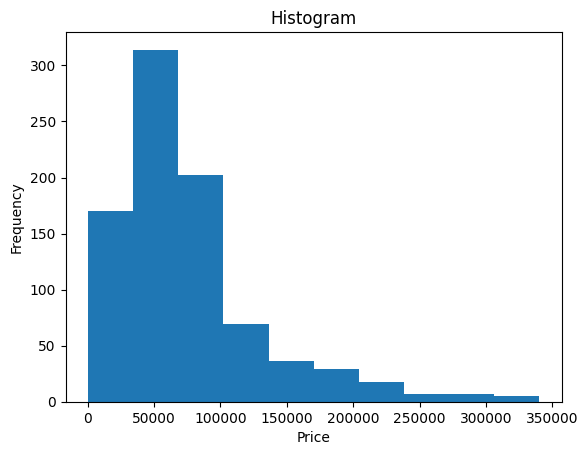

Błąd uczenia:       31679.46669738295
Błąd generalizacji: 27051.30517795209


In [249]:
samples_per_bin, bins = np.histogram(df_android['price'])
bins = bins[:-1]   # aby pozbyć się jednoosobowej grupy
bins = bins[::-1]  # odwrócenie wartości w liście

plt.hist(df_android['price'])

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.show()

df_android['classification'] = df_android.apply(classify_based_on_price, axis = 1, args = [bins, 'price'])

[e_train, e_test] = use_regression(df_android, all_attributes, 'price', 0.2, stratify_arg = 'classification')
print('Błąd uczenia:      ', e_train)
print('Błąd generalizacji:', e_test)

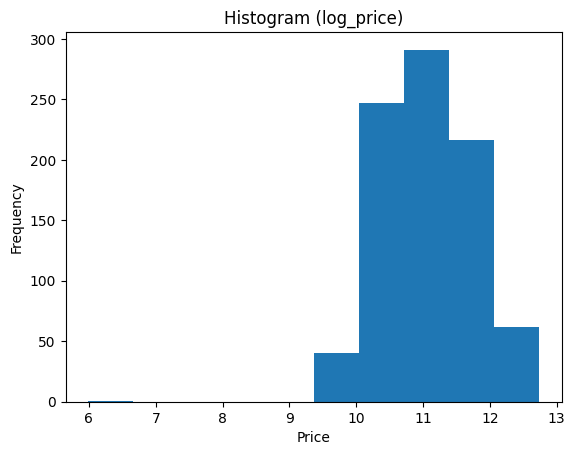

Błąd uczenia:       30979.75226942025
Błąd generalizacji: 30330.018593177752


In [250]:
df_android['log_price'] = np.log(df_android['price'])
samples_per_bin, bins = np.histogram(df_android['log_price'])

bins = bins[:-1]
bins[7] = bins[0]
bins = bins[::-1]

plt.hist(df_android['log_price'])

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram (log_price)')

plt.show()


df_android['class'] = df_android.apply(classify_based_on_price, axis = 1, args = [bins, 'log_price'])

[e_train, e_test] = use_regression(df_android, all_attributes, 'price', 0.2, stratify_arg = 'class')
print('Błąd uczenia:      ', e_train)
print('Błąd generalizacji:', e_test)

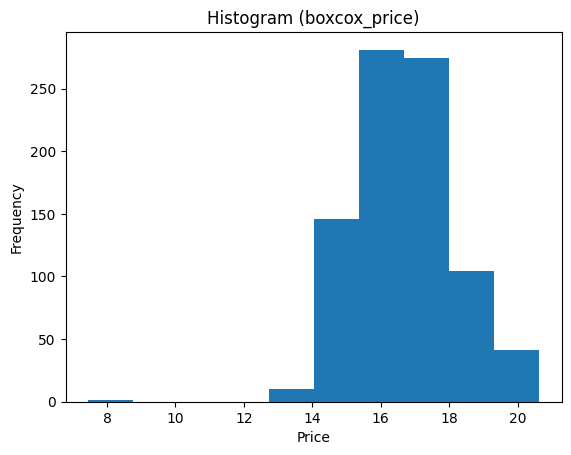

Błąd uczenia:       30981.71015981847
Błąd generalizacji: 30246.890254584087


In [251]:
from scipy.stats import boxcox

[df_android['boxcox_price'], best_lambda] = boxcox(df_android['price'])
samples_per_bin, bins = np.histogram(df_android['boxcox_price'])

bins = bins[:-1]
bins[5] = bins[0]
bins = bins[::-1]

plt.hist(df_android['boxcox_price'])

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram (boxcox_price)')

plt.show()

df_android['class'] = df_android.apply(classify_based_on_price, axis = 1, args = [bins, 'boxcox_price'])

[e_train, e_test] = use_regression(df_android, all_attributes, 'price', 0.2, stratify_arg = 'class')
print('Błąd uczenia:      ', e_train)
print('Błąd generalizacji:', e_test)

Dzięki proporcjonalnemu podziałowi błąd generalizacji nie zmniejszył się

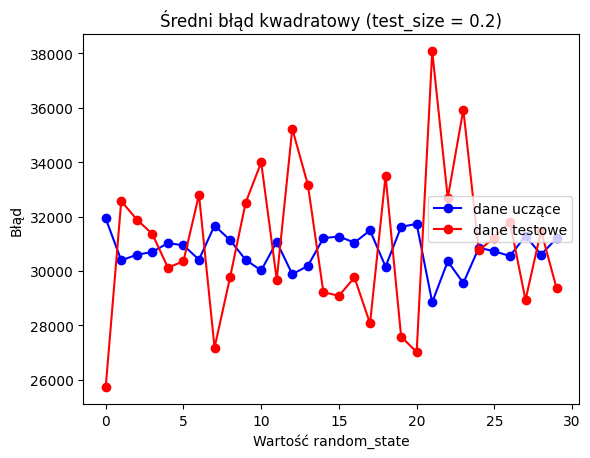

Minimalny błąd dla zbioru testowego = 25724.58857962461 dla wartości random_state = 0


In [252]:
r = range(30)
error_train = []
error_test = []
test_size = 0.2
for random in r:
    [e_train, e_test] = use_regression(df_android, all_attributes, 'price', test_size, random = random)
    error_train.append(e_train)
    error_test.append(e_test)

title = 'Średni błąd kwadratowy (test_size = ' + str(test_size) + ')'
x_label = 'Wartość random_state'
plot_results(r, error_train, error_test, title, x_label)
print('Minimalny błąd dla zbioru testowego =', min(error_test), 'dla wartości random_state =', r[error_test.index(min(error_test))])

Jednak dzięki wykorzystaniu innej wartości random_state przy podziale udało się jeszcze bardziej zmniejszyć wartość błędu.

Sprawdzenie zmiany względem normalizacji min-max i standaryzacji danych:

In [253]:
print('Normalizacja Min-Max')
[e_train_android_norm, e_test_android_norm] = use_regression(df_android, all_attributes, 'price', 0.2, random = 0, min_max = True)
print('Błąd uczenia      ', e_train_android_norm)
print('Błąd generalizacji', e_test_android_norm)
print()

print('Standaryzacja')
[e_train_android_stand, e_test_android_stand] = use_regression(df_android, all_attributes, 'price', 0.2, random = 0, standarization = True)
print('Błąd uczenia      ', e_train_android_stand)
print('Błąd generalizacji', e_test_android_stand)

Normalizacja Min-Max
Błąd uczenia       31934.406330603495
Błąd generalizacji 25724.588579624597

Standaryzacja
Błąd uczenia       31934.40633060349
Błąd generalizacji 25724.588579624604


Zarówno normalizacja Min-Max, jak i standaryzacja danych nie dały lepszych rezultatów

### Przeliczenie w celu porównania rozdzielenia zbioru danych

Tabela błędu dla rozdzielonych i nierozdzielonych zbiorów

| Zbiór                    | Błąd generalizacji |
| :---------------- | ------: |
| Nierozdzielone dane | 30994.79 |
| Zbiór danych Apple | 38048.27 |
| Zbiór danych Android | 25724.58  |

In [254]:
test_error         = 30994.79208498456
apple_test_error   = 38048.2768787509
android_test_error = 25724.58857962461

n_apple = len(df_apple)
n_android = len(df_android)
test_error_splitted = (n_apple*apple_test_error + n_android*android_test_error)/(n_apple + n_android)
print('Całkowity błąd przy rozdzieleniu danych wynosi:', test_error_splitted)
print('Jest on o', 1 - test_error_splitted/test_error, '% mniejszy od błędu przed rozdzieleniem danych')

Całkowity błąd przy rozdzieleniu danych wynosi: 26907.558658971124
Jest on o 0.13186839307734866 % mniejszy od błędu przed rozdzieleniem danych


Jak można zauważyć rozdzielenie danych na dwa zbiory, w zależnosci od systemu operacyjnego było dobrym rozwiązaniem

## Zapis modeli w pliku binarnym

In [255]:
def save_model(df, attributes, dec_attribute, test_size, random = 0, min_max = False, standarization = False, stratify_arg = ""):
    ''' 
    parametry:
        df - ramka danych, która zostanie podzielona na dane uczące i testowe,
        dec_attribute - atrybut decyzujący,
        test_size - rozmiar zbioru testowego, liczba w przedziale (0.0, 1.0>,
        random - wartość seed random_state w funkcji train_test_split,
        max_min - jeżeli True dokonuje normalizacji min_max danych,
        standarization - jeżeli True dokonuje standaryzacji danych

    zwraca:
        model - wytrenowany względem użytych parametrów model regresji liniowej
    '''
    df_t = df.loc[:, attributes]

    if min_max == True and standarization == True:
        raise ValueError('Podano wartość min_max == True i standarization == True')

    if min_max == True:
        print('Wykonuję normalizację')
        scaler = MinMaxScaler()
        df_t = scaler.fit_transform(df_t)
    
    if standarization == True:
        print('Wykonuję standaryzację')
        scaler = StandardScaler()
        df_t = scaler.fit_transform(df_t)

    if stratify_arg == "":
        x_train, x_test, y_train, y_test = train_test_split(df_t, df[dec_attribute], test_size = test_size, random_state = random)
    else:
        x_train, x_test, y_train, y_test = train_test_split(df_t, df[dec_attribute], test_size = test_size, random_state = random, stratify = df[stratify_arg])

    model = LinearRegression()
    model.fit(x_train, y_train)
    
    return model

In [256]:
apple_model =  save_model(df_apple, all_attributes, 'price', 0.4, random = 8)
pickle.dump(apple_model, open("apple_model.pkl", "wb"))

android_model = save_model(df_android, all_attributes, 'price', 0.2, random = 0)
pickle.dump(android_model, open("android_model.pkl", "wb"))

## Wyniki błędu dla eliminacja atrybutów silnie skorelowanych

## Android

In [257]:
df_android['price'].describe()

count       857.000000
mean      76135.154026
std       55107.838671
min         399.000000
25%       37999.000000
50%       59999.000000
75%       88415.000000
max      339999.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Histogram ceny dla smartfonów z Android')

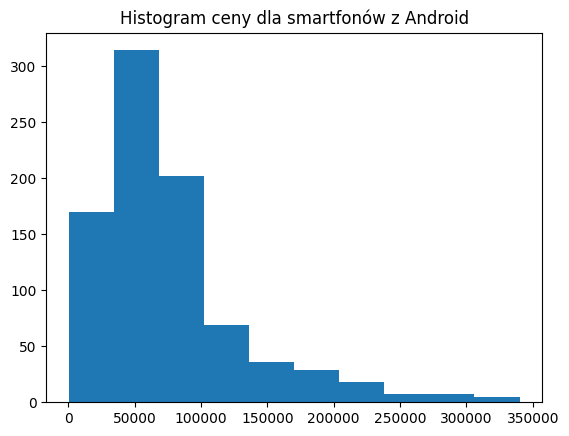

In [258]:
samples_per_bin, bins = np.histogram(df_android['price'])
plt.hist(df_android['price'])
plt.title('Histogram ceny dla smartfonów z Android')

In [278]:
print('Błąd dla android:', 25724.58857962461)

Błąd dla android: 25724.58857962461


Błąd RMSE ma wartość ok. 26 tysięcy, gdzie najwięcej smartfonów ma wartość około 50 tysięcy, z wartością średnią dla całego zbioru 76 tysięcy. Nie jest to świetny wynik, ponieważ dla przeciętnego smartfonu z tego zbioru możemy otrzymać wartość różniącą się o ponad 30%, jego wartości ceny. Jednakże patrząc na rozpiętość ceny dla trenowanego modelu i fakt, że samo odchylenie standardowe ceny wynosi 55 tysięcy nie jest to zły wynik, który pozwoli na przybliżone oszacowanie ceny, zwłaszcza, że wiele modeli kosztuje ponad 100 tysięcy.

## Apple

In [260]:
df_apple['price'].describe()

count        91.000000
mean     217071.076923
std      127043.757238
min       22999.000000
25%      132499.000000
50%      209999.000000
75%      284900.000000
max      555999.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Histogram ceny dla smartfonów z Apple')

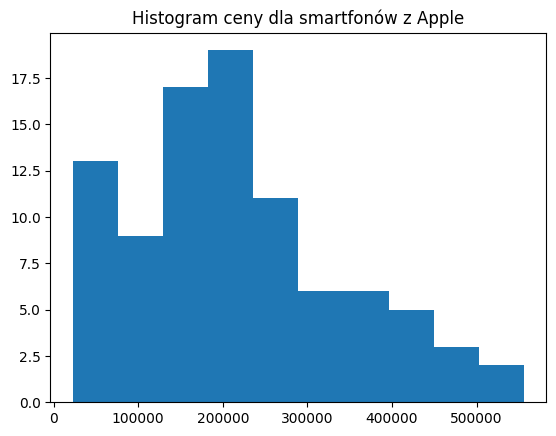

In [261]:
samples_per_bin, bins = np.histogram(df_apple['price'])
plt.hist(df_apple['price'])
plt.title('Histogram ceny dla smartfonów z Apple')

In [262]:
print('Błąd dla apple:', 38048.2768787509)

Błąd dla apple: 38048.2768787509


Błąd RMSE ma wartość ok. 38 tysięcy, gdzie najwięcej smartfonów ma wartość około 200 tysięcy, z wartością średnią dla całego zbioru 217 tysięcy. Jest to dosyć dobry wynik, ponieważ dla przeciętnego smartfona z tego zbioru możemy otrzymać wartość różniącą się jedynie o około ponad 17,5%, jego wartości ceny. Ponownie zwracając uwagę na rozpiętość ceny dla trenowanego modelu i wartość odchylenie standardowe ceny wynoszącą 127 tysięcy jest to dobry wynik, który pozwola na w miarę trafne oszacowanie ceny. 
Dla droższych modeli, powyżej ceny 300 tysięcy, które stanowią około 20 % zbioru błąd będzie już na prawdę niski.
Należy zauważyć, że dla bardzo tanich modeli z przedziału ceny 23 - 77 tysięcy, ten błąd będzie już zdecydowanie nieakceptowalny. Należałoby najlepiej pozbyć się tych najtańszych urządzeń z danych uczących, lecz to spowodowałoby kolejne zmniejszenie zbioru danych.

## Sprawdzenie eliminacji korelacji

In [263]:
android_attributes = all_attributes[::]
android_attributes.remove('main_camera')
[e_train, e_test] = use_regression(df_android, android_attributes, 'price', 0.2, random = 0)
print('Błąd android, dla eliminacji atrybutu main_camera:', e_test)

Błąd android, dla eliminacji atrybutu main_camera: 26308.087798263292


Po pozbyciu się atrybutu main_camera błąd nieznacznie wzrósł, o ok. 500.

In [279]:
apple_attributes = all_attributes[::]
apple_attributes.remove('main_camera')
apple_attributes.remove('front_camera')
[e_train, e_test] = use_regression(df_apple, apple_attributes, 'price', 0.4, random = 8)
print('Błąd apple, dla eliminacji atrybutów main_camera i front_camera:', e_test)

Błąd apple, dla eliminacji atrybutów main_camera i front_camera: 37896.683245924156


Po pozbyciu się atrybutów main_camera i front_camera błąd nieznacznie zmalał o ok. 100.

### Zapisanie zredukowanych wersji modeli

In [265]:
apple_model_reduced = save_model(df_apple, apple_attributes, 'price', 0.4, random = 8)
pickle.dump(apple_model_reduced, open("apple_model_reduced.pkl", "wb"))

android_model_reduced = save_model(df_android, android_attributes, 'price', 0.2, random = 0)
pickle.dump(android_model_reduced, open("android_model_reduced.pkl", "wb"))

Redukcja każdego z atrybutów pozwoliła na zaoszczędzenie około 30 B na każdym atrybucie, czyli ok. 4% wielkości modelu.
Dla modelu regresji, dla Android była to zmiana z 783 B na 753 B.
Dla modelu regresji, dla Apple była to zmiana z 783 B na 722 B.

### Porównanie szybkości działania modeli po zredukowaniu ilości atrybutow

In [266]:
values = [12, 3900, 8, 256, 89, 3, 72, 50, 6.1, 120]
reduced_values = [12, 3900, 8, 256, 89, 3, 72, 6.1, 120]
reduced_column_names = ['front_camera', 'battery_capacity', 'ram', 'internal_storage', 'score', 'num_cameras', 'sum_MP', 'screen_size', 'refresh_rate']

df_values = pd.DataFrame(values).transpose()
df_values.columns = all_attributes

df_reduced_values = pd.DataFrame(reduced_values).transpose()
df_reduced_values.columns = reduced_column_names

import time

start = time.time()
for i in range(10000):
    android_model.predict(df_values)
end = time.time()
print(end - start)

start = time.time()
for i in range(10000):
    android_model_reduced.predict(df_reduced_values)
end = time.time()
print(end - start)

6.74351167678833
6.181268215179443


Wyeliminowanie jednego z atrybutów znacznie zmniejsza czas predykcji o ok. 8%.

In [267]:
values = [12, 3900, 8, 256, 89, 3, 72, 50, 6.1, 120]
reduced_values = [3900, 8, 256, 89, 3, 72, 6.1, 120]
reduced_column_names = ['battery_capacity', 'ram', 'internal_storage', 'score', 'num_cameras', 'sum_MP', 'screen_size', 'refresh_rate']

df_values = pd.DataFrame(values).transpose()
df_values.columns = all_attributes

df_reduced_values = pd.DataFrame(reduced_values).transpose()
df_reduced_values.columns = reduced_column_names

import time

start = time.time()
for i in range(10000):
    apple_model.predict(df_values)
end = time.time()
print(end - start)

start = time.time()
for i in range(10000):
    apple_model_reduced.predict(df_reduced_values)
end = time.time()
print(end - start)

6.420669317245483
6.063128471374512


Podobnie wyeliminowanie większej liczby atrybutów zmniejsza go jeszcze bardziej, w tym przypakdu o ok..

## Porównanie dokładności dla innych modeli

### Drzewo Decyzujące

In [268]:
def use_decision_tree_regressor(df, attributes, dec_attribute, test_size, random = 0, min_max = False, standarization = False, stratify_arg = ""):
    ''' 
    parametry:
        df - ramka danych, która zostanie podzielona na dane uczące i testowe,
        dec_attribute - atrybut decyzujący,
        test_size - rozmiar zbioru testowego, liczba w przedziale (0.0, 1.0>,
        random - wartość seed random_state w funkcji train_test_split,
        max_min - jeżeli True dokonuje normalizacji min_max danych,
        standarization - jeżeli True dokonuje standaryzacji danych
        *uwaga jeżeli param

    zwraca:
        e_train - błąd uczenia,
        e_test - błąd generalizacji
    '''
    df_t = df.loc[:, attributes]

    if min_max == True and standarization == True:
        raise ValueError('Podano wartość min_max == True i standarization == True')

    if min_max == True:
        scaler = MinMaxScaler()
        df_t = scaler.fit_transform(df_t)
    
    if standarization == True:
        scaler = StandardScaler()
        df_t = scaler.fit_transform(df_t)

    if stratify_arg == "":
        x_train, x_test, y_train, y_test = train_test_split(df_t, df[dec_attribute], test_size = test_size, random_state = random)
    else:
        x_train, x_test, y_train, y_test = train_test_split(df_t, df[dec_attribute], test_size = test_size, random_state = random, stratify = df[stratify_arg])

    model = DecisionTreeRegressor()

    param_grid = {
        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 4, 8, 12],
    }

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

    grid_search.fit(x_train, y_train)

    best_params = grid_search.best_params_
    print(f'Najlepsze parametry: {best_params}')

    best_model = grid_search.best_estimator_

    y_pred_train = best_model.predict(x_train)
    e_train = metrics.mean_squared_error(y_train, y_pred_train)
    y_pred_test = best_model.predict(x_test)
    e_test = metrics.mean_squared_error(y_test, y_pred_test)
    
    return sqrt(e_train), sqrt(e_test)

#### Android

In [269]:
[e_train, e_test] = use_decision_tree_regressor(df_android, all_attributes, 'price', 0.2, random = 0)
print('Błąd uczenia:      ', e_train)
print('Błąd generalizacji:', e_test)

Najlepsze parametry: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Błąd uczenia:       12871.699423606738
Błąd generalizacji: 17343.24915361141


In [270]:
[e_train, e_test] = use_decision_tree_regressor(df_android, android_attributes, 'price', 0.2, random = 0)
print('Błąd uczenia:      ', e_train)
print('Błąd generalizacji:', e_test)

Najlepsze parametry: {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2}
Błąd uczenia:       14601.878486235933
Błąd generalizacji: 18828.60270037523


#### Apple

In [271]:
[e_train, e_test] = use_decision_tree_regressor(df_apple, all_attributes, 'price', 0.4, random = 8)
print('Błąd uczenia:      ', e_train)
print('Błąd generalizacji:', e_test)

Najlepsze parametry: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Błąd uczenia:       9612.362125756827
Błąd generalizacji: 83455.8194797639


In [272]:
[e_train, e_test] = use_decision_tree_regressor(df_apple, apple_attributes, 'price', 0.4, random = 8)
print('Błąd uczenia:      ', e_train)
print('Błąd generalizacji:', e_test)

Najlepsze parametry: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Błąd uczenia:       144.43379234227137
Błąd generalizacji: 66628.66305106964


### AdaBoost

In [273]:
def use_ada_boost_regressor(df, attributes, dec_attribute, test_size, random = 0, min_max = False, standarization = False, stratify_arg = ""):
    ''' 
    parametry:
        df - ramka danych, która zostanie podzielona na dane uczące i testowe,
        dec_attribute - atrybut decyzujący,
        test_size - rozmiar zbioru testowego, liczba w przedziale (0.0, 1.0>,
        random - wartość seed random_state w funkcji train_test_split,
        max_min - jeżeli True dokonuje normalizacji min_max danych,
        standarization - jeżeli True dokonuje standaryzacji danych
        *uwaga jeżeli param

    zwraca:
        e_train - błąd uczenia,
        e_test - błąd generalizacji
    '''
    df_t = df.loc[:, attributes]

    if min_max == True and standarization == True:
        raise ValueError('Podano wartość min_max == True i standarization == True')

    if min_max == True:
        scaler = MinMaxScaler()
        df_t = scaler.fit_transform(df_t)
    
    if standarization == True:
        scaler = StandardScaler()
        df_t = scaler.fit_transform(df_t)

    if stratify_arg == "":
        x_train, x_test, y_train, y_test = train_test_split(df_t, df[dec_attribute], test_size = test_size, random_state = random)
    else:
        x_train, x_test, y_train, y_test = train_test_split(df_t, df[dec_attribute], test_size = test_size, random_state = random, stratify = df[stratify_arg])

    model = AdaBoostRegressor()

    param_grid = {
        "n_estimators": [50, 100, 150, 200, 250],
        "learning_rate": [0.01, 0.1, 1, 10, 100],
    }

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

    grid_search.fit(x_train, y_train)

    best_params = grid_search.best_params_
    print(f'Najlepsze parametry: {best_params}')

    best_model = grid_search.best_estimator_

    y_pred_train = best_model.predict(x_train)
    e_train = metrics.mean_squared_error(y_train, y_pred_train)
    y_pred_test = best_model.predict(x_test)
    e_test = metrics.mean_squared_error(y_test, y_pred_test)
    
    return sqrt(e_train), sqrt(e_test)

#### Android

In [274]:
[e_train, e_test] = use_ada_boost_regressor(df_android, all_attributes, 'price', 0.2, random = 0)
print('Błąd uczenia:      ', e_train)
print('Błąd generalizacji:', e_test)

Najlepsze parametry: {'learning_rate': 0.1, 'n_estimators': 200}
Błąd uczenia:       21030.651462686434
Błąd generalizacji: 20592.207735467684


In [275]:
[e_train, e_test] = use_ada_boost_regressor(df_android, android_attributes, 'price', 0.2, random = 0)
print('Błąd uczenia:      ', e_train)
print('Błąd generalizacji:', e_test)

Najlepsze parametry: {'learning_rate': 0.1, 'n_estimators': 200}
Błąd uczenia:       21388.23874778153
Błąd generalizacji: 21114.379306956595


#### Apple

In [276]:
[e_train, e_test] = use_ada_boost_regressor(df_apple, all_attributes, 'price', 0.4, random = 8)
print('Błąd uczenia:      ', e_train)
print('Błąd generalizacji:', e_test)

Najlepsze parametry: {'learning_rate': 1, 'n_estimators': 250}
Błąd uczenia:       20379.34883003466
Błąd generalizacji: 44814.61485214525


In [277]:
[e_train, e_test] = use_ada_boost_regressor(df_apple, apple_attributes, 'price', 0.4, random = 8)
print('Błąd uczenia:      ', e_train)
print('Błąd generalizacji:', e_test)

Najlepsze parametry: {'learning_rate': 1, 'n_estimators': 250}
Błąd uczenia:       20990.497975944952
Błąd generalizacji: 45872.89608916138


### Podsumowanie rezultatów uczenia, dla różnych modeli, przed i po redukcji atrybutów (wymiarów)

| Metoda                    | Zbiór Android | Zbiór Apple    |
| :---------------- | ------: | ----: |
| Regresja Liniowa | 25724.58 | 38048.27 |
| Regresja Liniowa (zredukowana) | 26308.08 | 37896.68 |
| Drzewo Decyzyjne |   17343.24   | 83455.81 |
| Drzewo Decyzyjne (zredukowane) |   18828.60  | 66628.66 |
| AdaBoost           |   20592.20  | 44814.61 |
| AdaBoost (zredukowane)|   21114.37  | 45872.89 |

Jak można zauważyć metoda z użyciem Drzewa Decyzyjnego i Lasu Pieńków (AdaBoost) daje lepsze rezultaty, ale jedynie dla dużego zbioru Android, dla małego zbioru Apple otrzymujemy gorsze rezultaty. Chociaż zbiór Apple, jest wyjątkowy, ponieważ tylko dla niego redukcja atrybutów użytych w procesie uczenia dostarcza lepsze rezultaty.

Podsumowując najlepiej jest dla zbioru Android użyć Regresji z Drzewa Decyzyjnego, a dla zbioru Apple Regresji Liniowej ze zredukowaną liczbą atrybutów.